In [177]:
# CÉLULA 1: Importações e Configuração Inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Configuração para melhor visualização
sns.set_theme()
pd.set_option('display.max_columns', None)



Análise inicial dos dados:
Número de países: 167

Estatísticas descritivas:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150

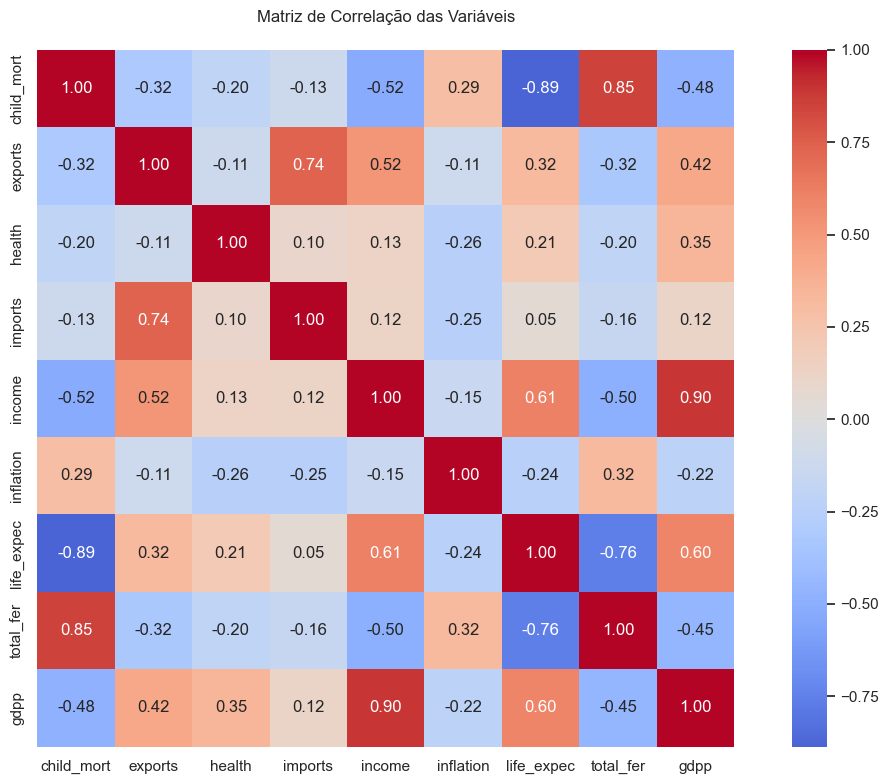

In [178]:
# CÉLULA 2: Carregamento e Análise Inicial dos Dados
def load_and_analyze_data(file_path):
    """
    Carrega os dados e realiza análise inicial
    """
    # Carregar dados
    df = pd.read_csv(file_path)
    
    # Análise inicial
    print("\nAnálise inicial dos dados:")
    print(f"Número de países: {df['country'].nunique()}")
    print("\nEstatísticas descritivas:")
    print(df.describe())
    print("\nValores ausentes:")
    print(df.isnull().sum())
    
    # Definir colunas numéricas
    numerical_columns = ['child_mort', 'exports', 'health', 'imports', 'income', 
                        'inflation', 'life_expec', 'total_fer', 'gdpp']
    
    # Análise de correlação
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True)
    plt.title('Matriz de Correlação das Variáveis', pad=20)
    plt.tight_layout()
    plt.show()
    
    return df, numerical_columns

df, numerical_columns = load_and_analyze_data(file_path)


Análise de Assimetria e Curtose:
            Skewness   Kurtosis
child_mort  1.450774   1.766882
exports     2.445824  10.138666
health      0.705746   0.694196
imports     1.905276   6.755854
income      2.231480   7.028657
inflation   5.154049  41.742502
life_expec -0.970996   1.151591
total_fer   0.967092  -0.186779
gdpp        2.218051   5.527891


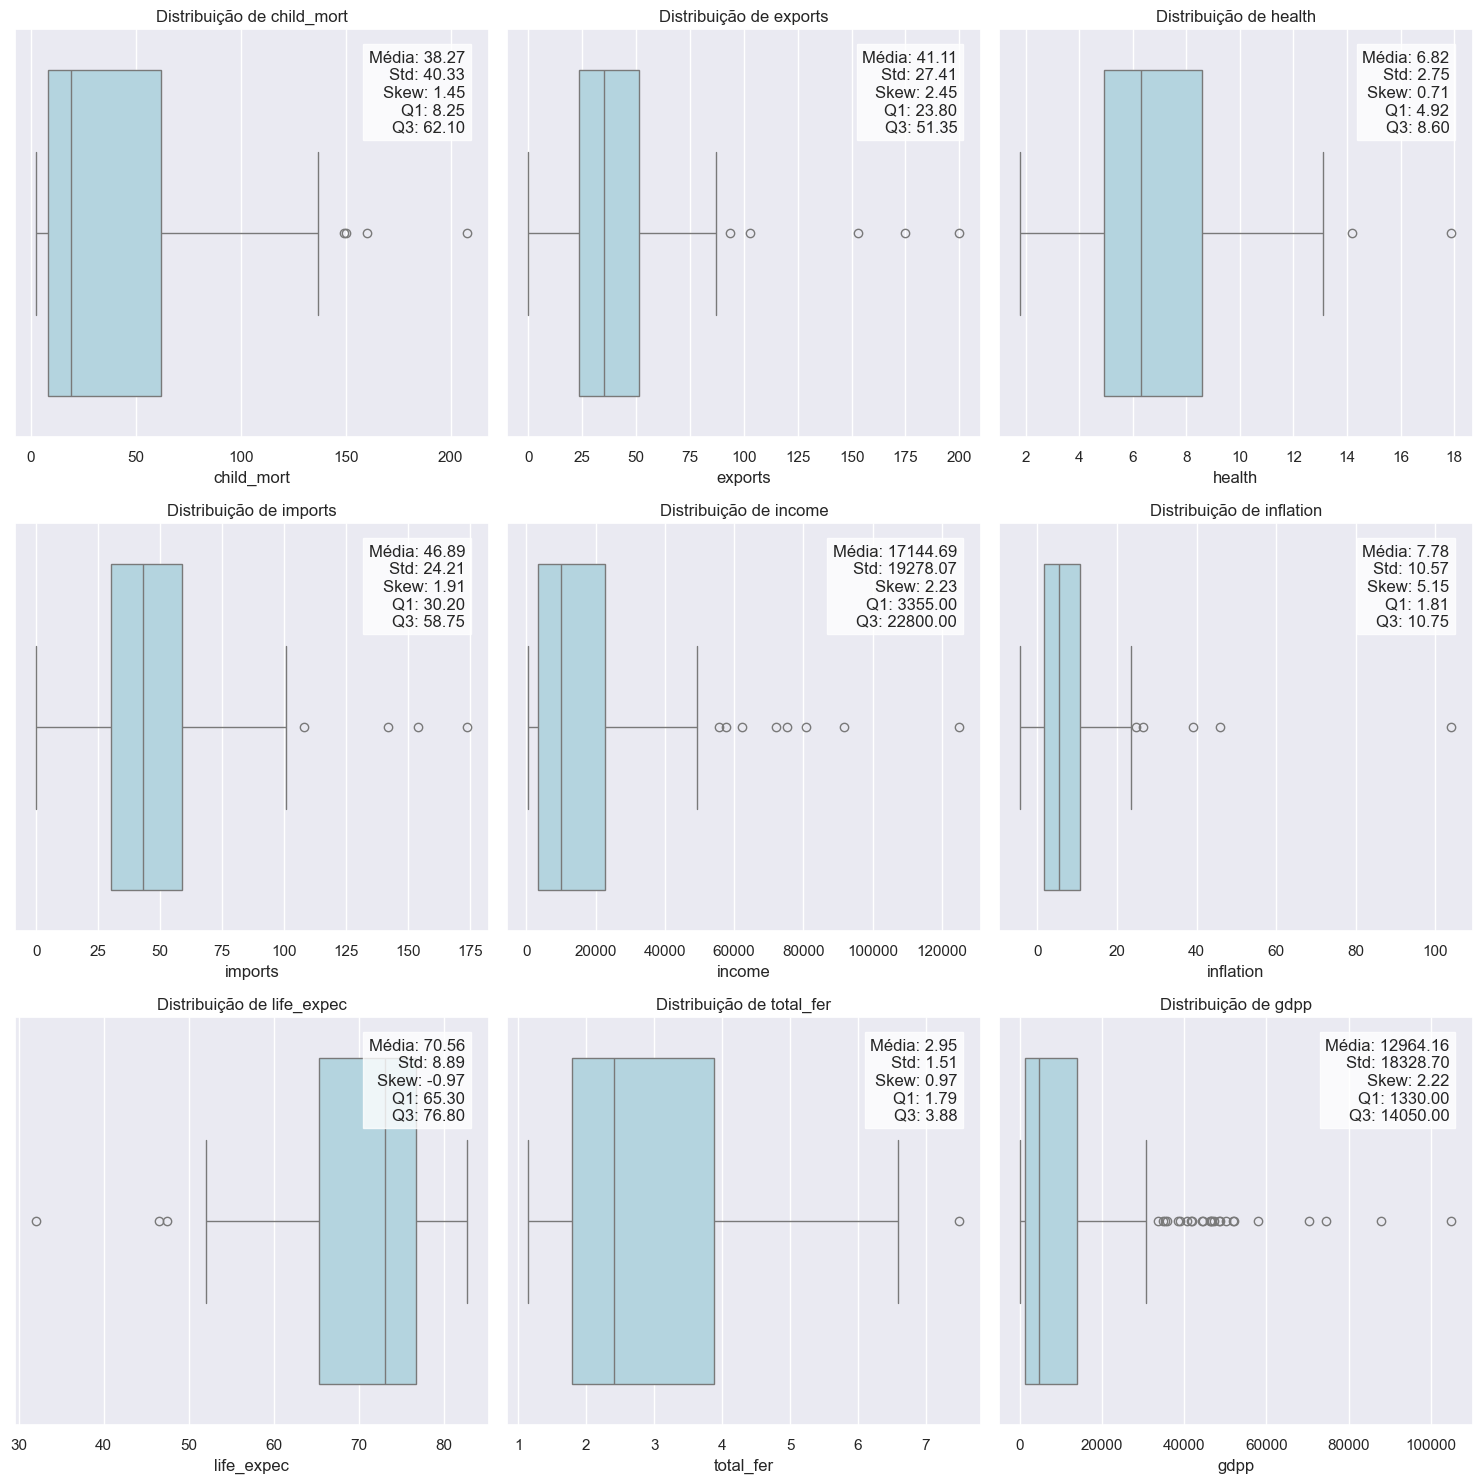

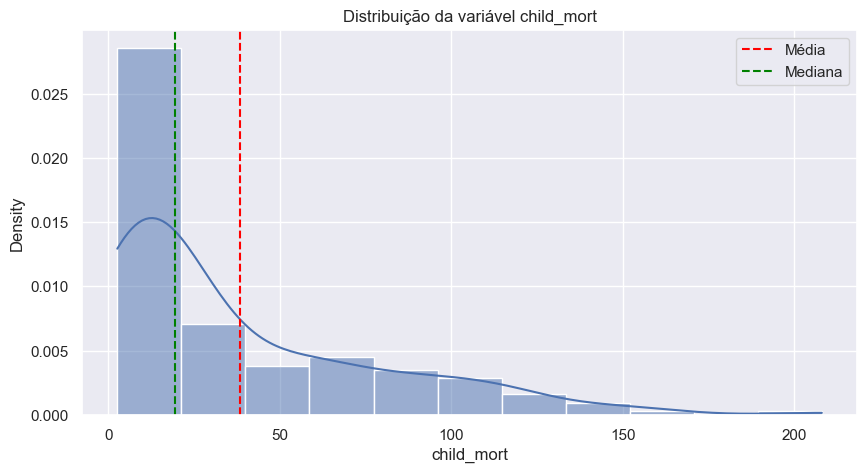

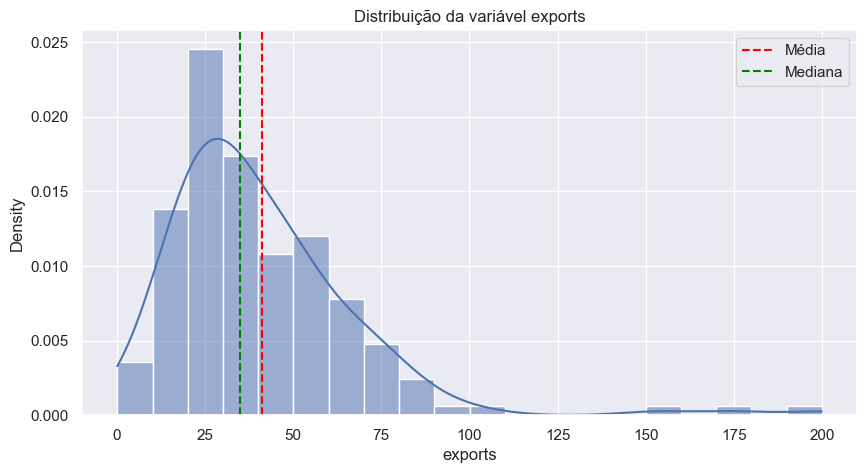

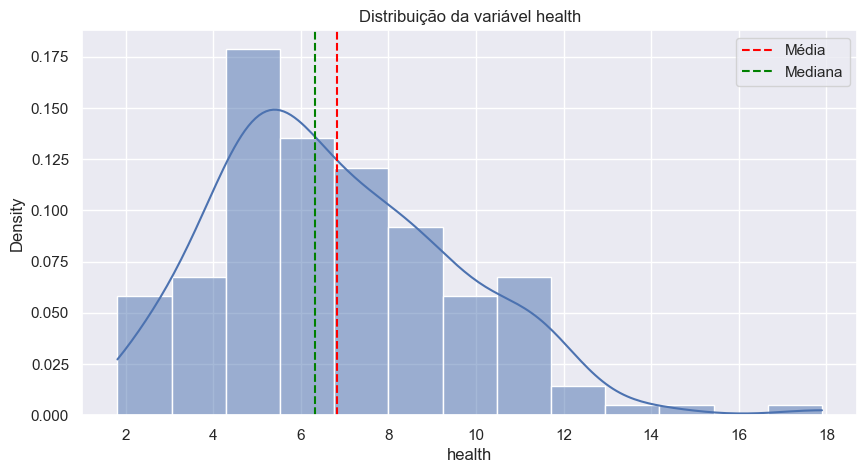

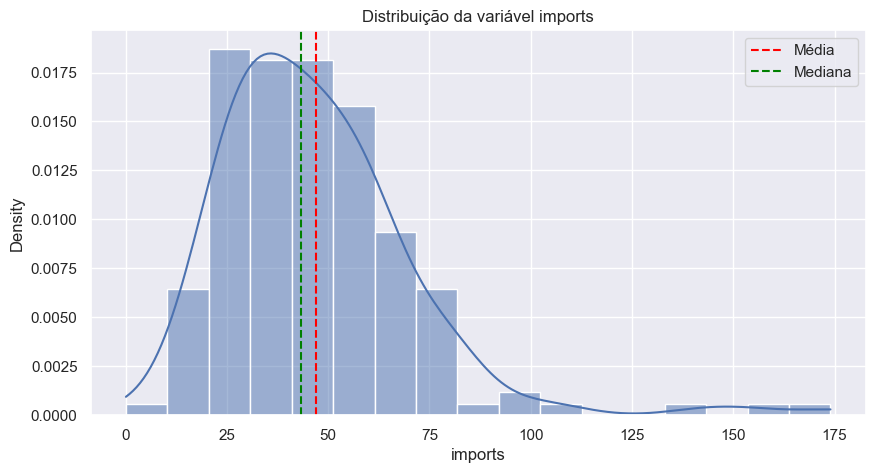

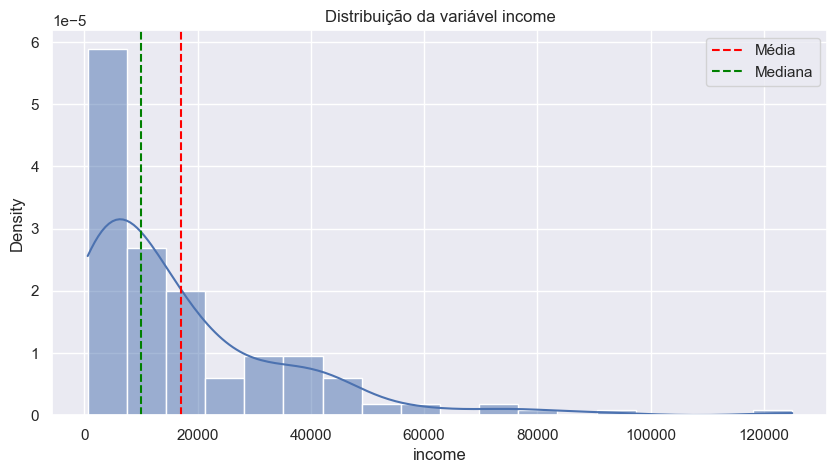

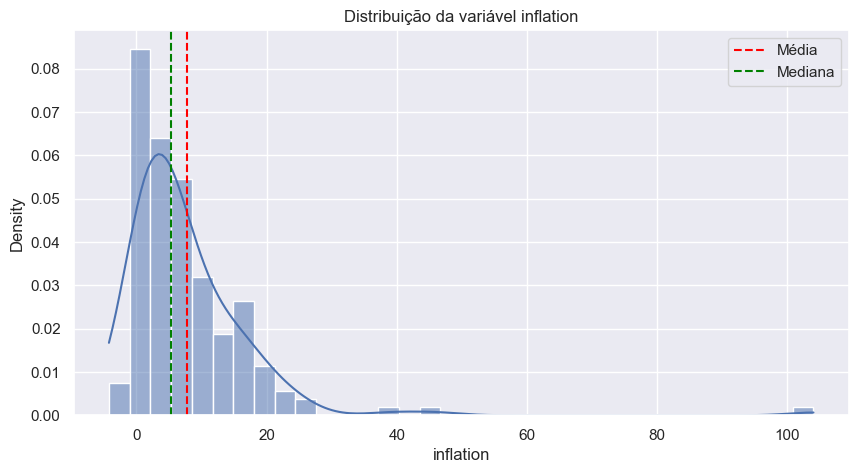

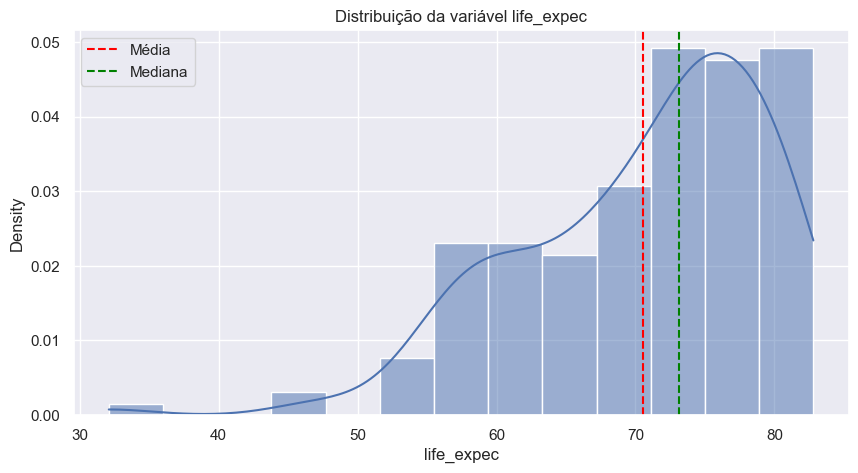

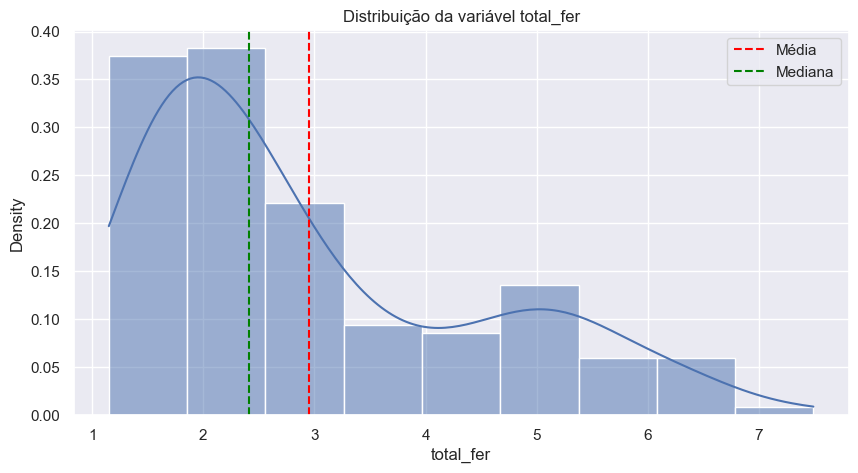

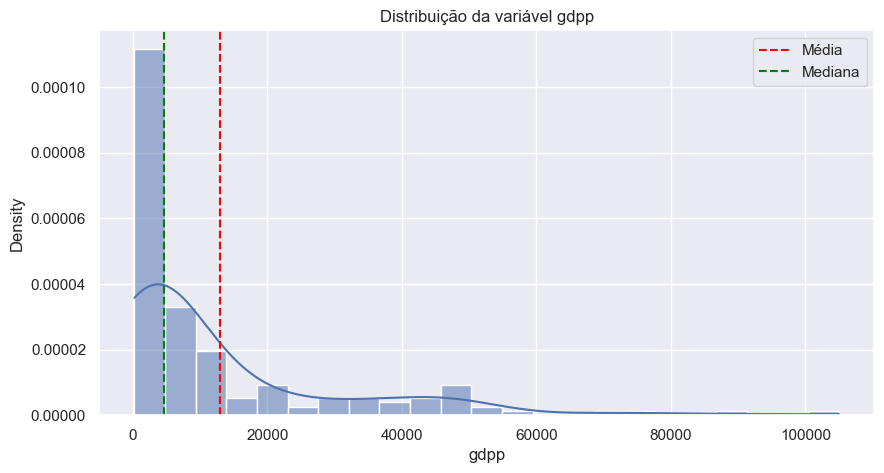

In [179]:
# CÉLULA 3: Análise Detalhada das Distribuições
def analyze_distributions(df, numerical_columns):
    """
    Realiza análise detalhada das distribuições das variáveis
    """
    # Análise de assimetria e curtose
    skew_kurt = pd.DataFrame({
        'Skewness': df[numerical_columns].skew(),
        'Kurtosis': df[numerical_columns].kurtosis()
    })
    print("\nAnálise de Assimetria e Curtose:")
    print(skew_kurt)
    
    # Boxplots e histogramas melhorados
    n_cols = 3
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 5*n_rows))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        
        sns.boxplot(x=df[col], color='lightblue')
        plt.title(f'Distribuição de {col}')
        
        # Adicionar estatísticas detalhadas
        stats = df[col].describe()
        plt.text(0.95, 0.95,
                f'Média: {stats["mean"]:.2f}\n'
                f'Std: {stats["std"]:.2f}\n'
                f'Skew: {df[col].skew():.2f}\n'
                f'Q1: {stats["25%"]:.2f}\n'
                f'Q3: {stats["75%"]:.2f}',
                transform=plt.gca().transAxes,
                va='top', ha='right',
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Histogramas com KDE
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True, stat='density')
        plt.title(f'Distribuição da variável {col}')
        plt.axvline(df[col].mean(), color='red', linestyle='--', label='Média')
        plt.axvline(df[col].median(), color='green', linestyle='--', label='Mediana')
        plt.legend()
        plt.show()
    
    return skew_kurt

skew_kurt = analyze_distributions(df, numerical_columns)

Iniciando pré-processamento dos dados...

Variáveis com alta assimetria (>1.5):
exports: 2.45
imports: 1.91
income: 2.23
inflation: 5.15
gdpp: 2.22

Resumo dos outliers encontrados:
child_mort: 4 outliers
exports: 5 outliers
health: 2 outliers
imports: 2 outliers
income: 0 outliers
inflation: 2 outliers
life_expec: 3 outliers
total_fer: 1 outliers
gdpp: 0 outliers


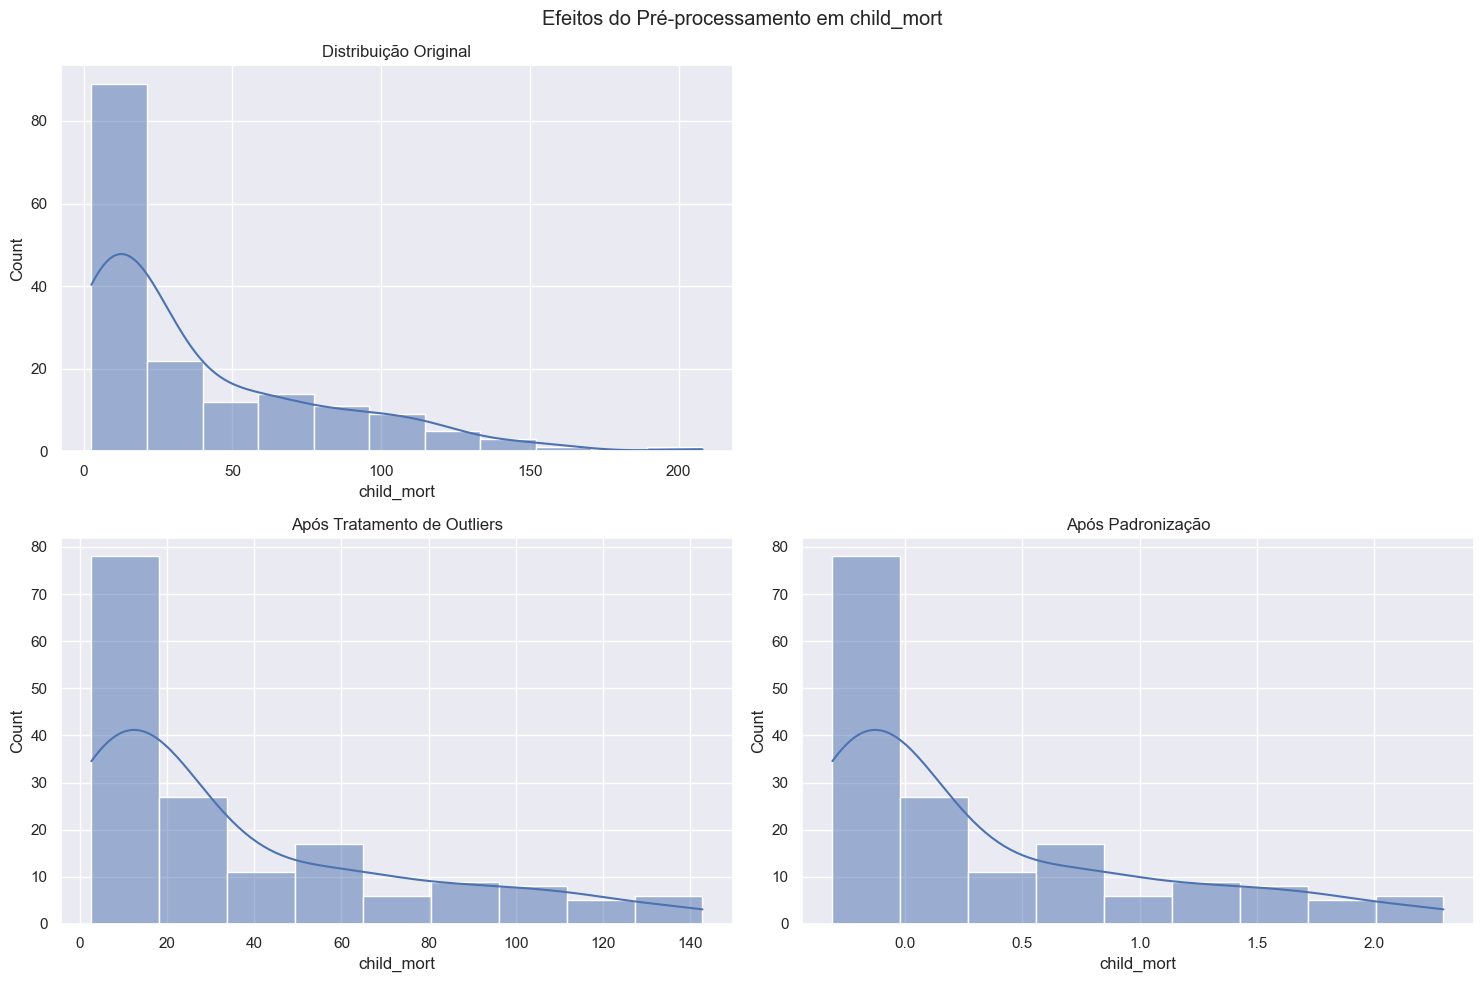

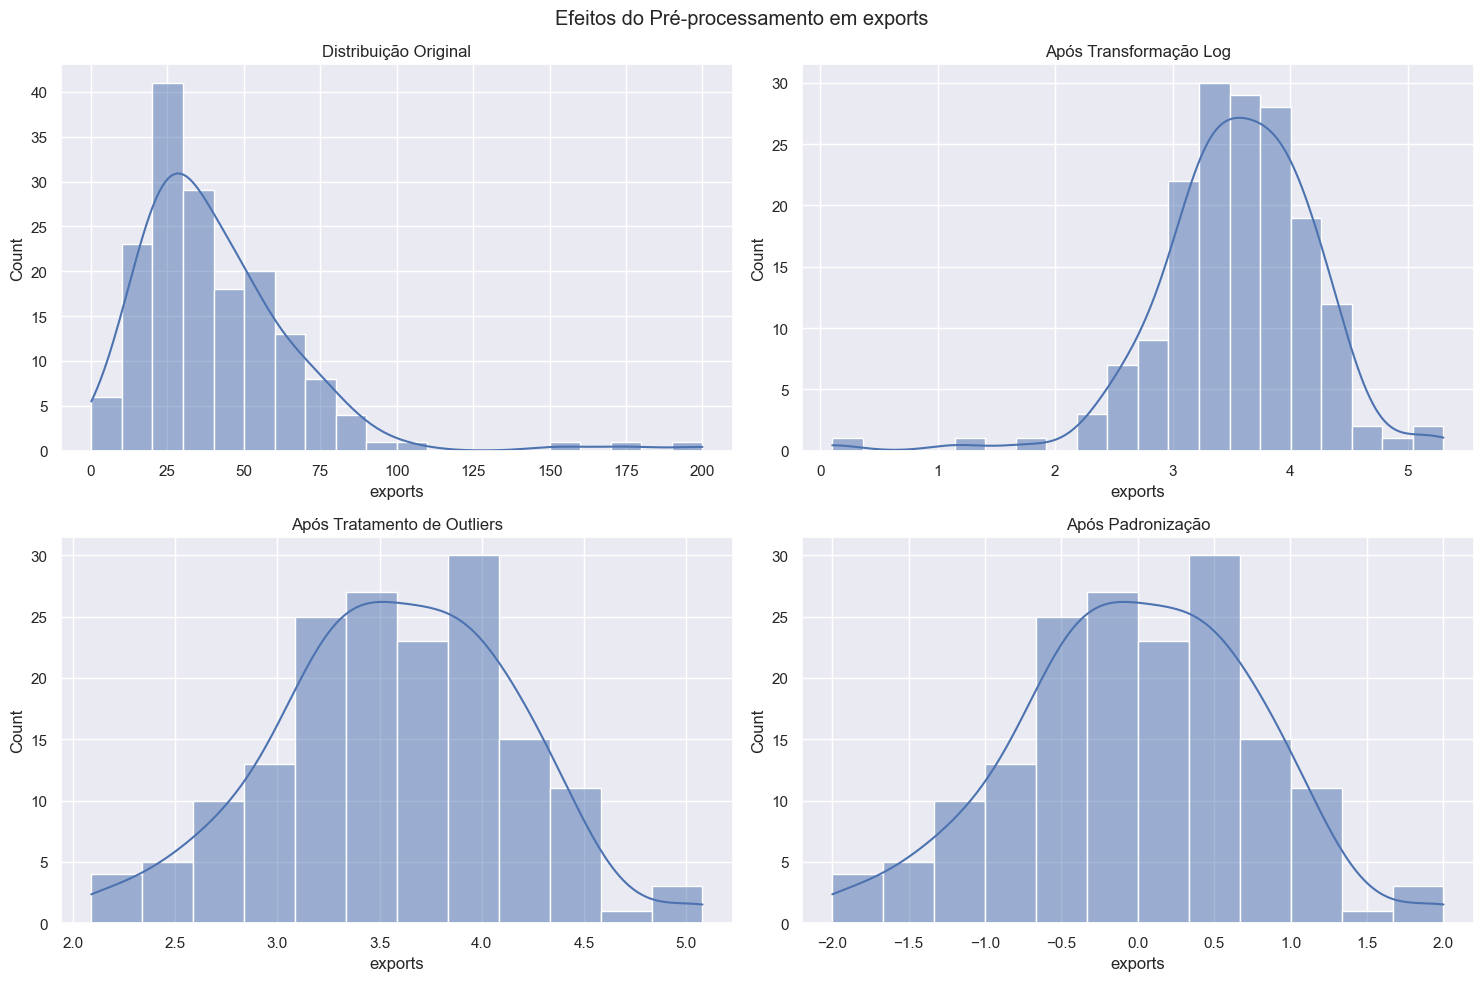

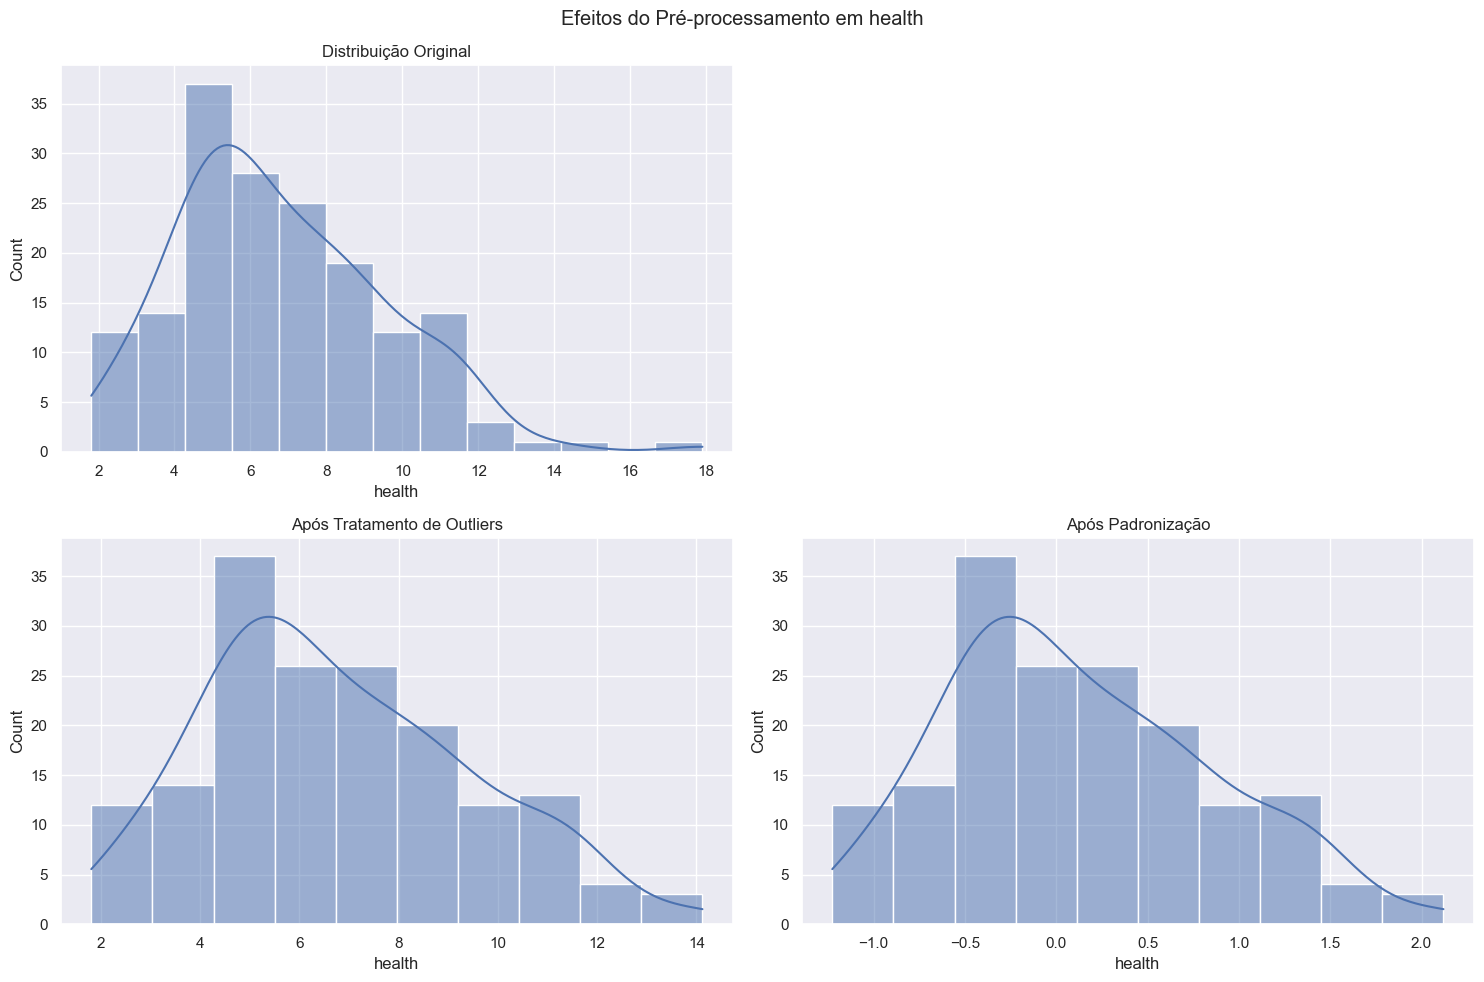

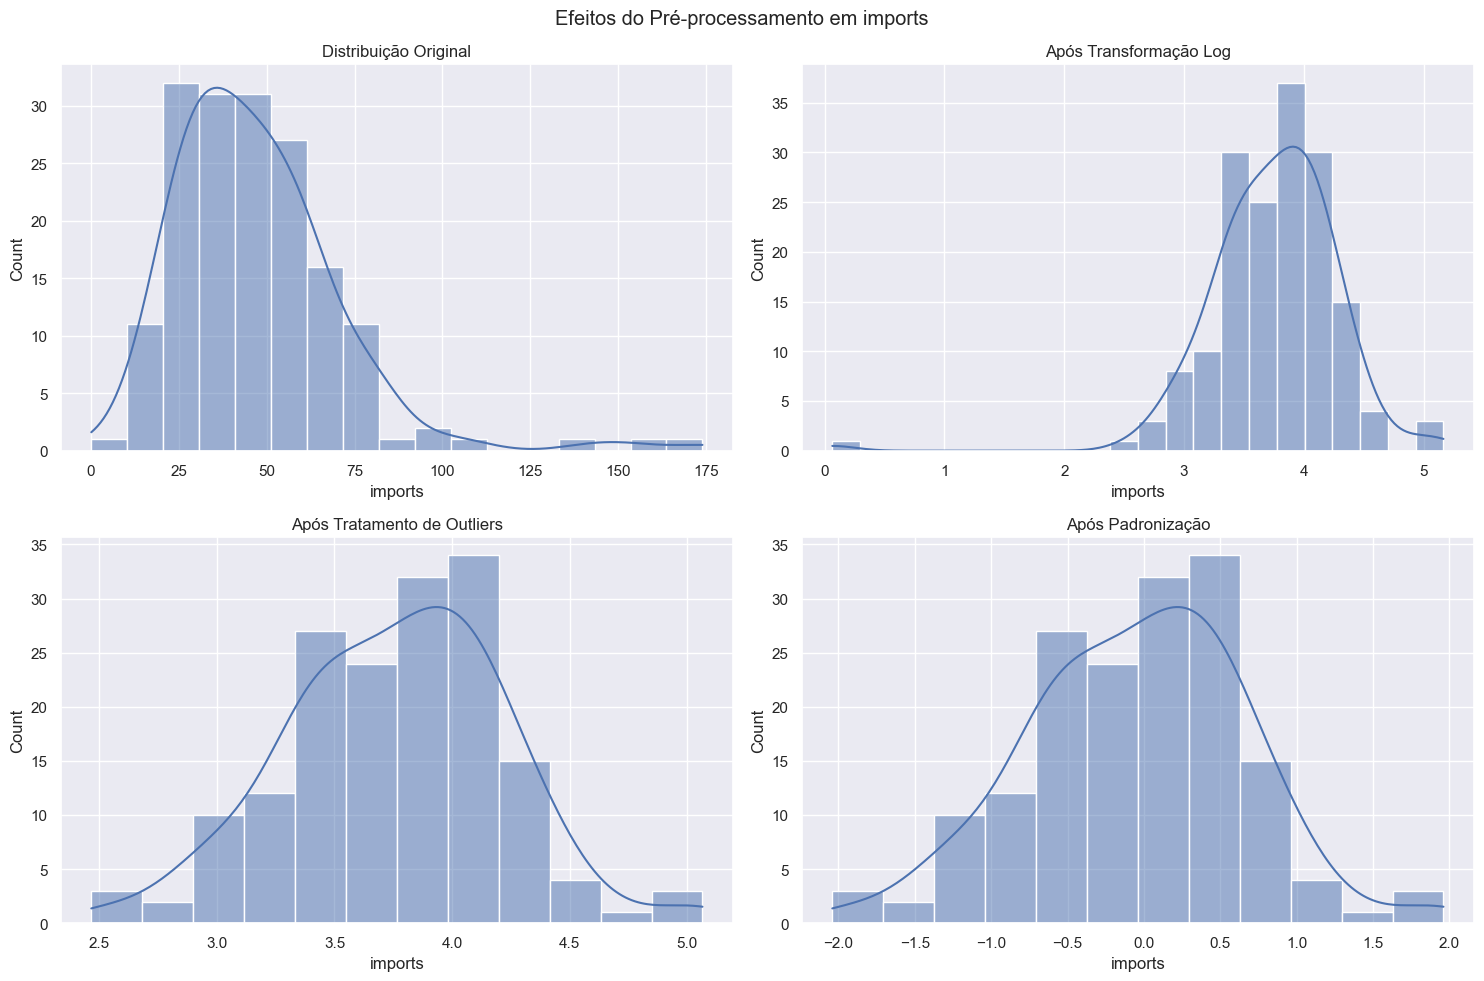

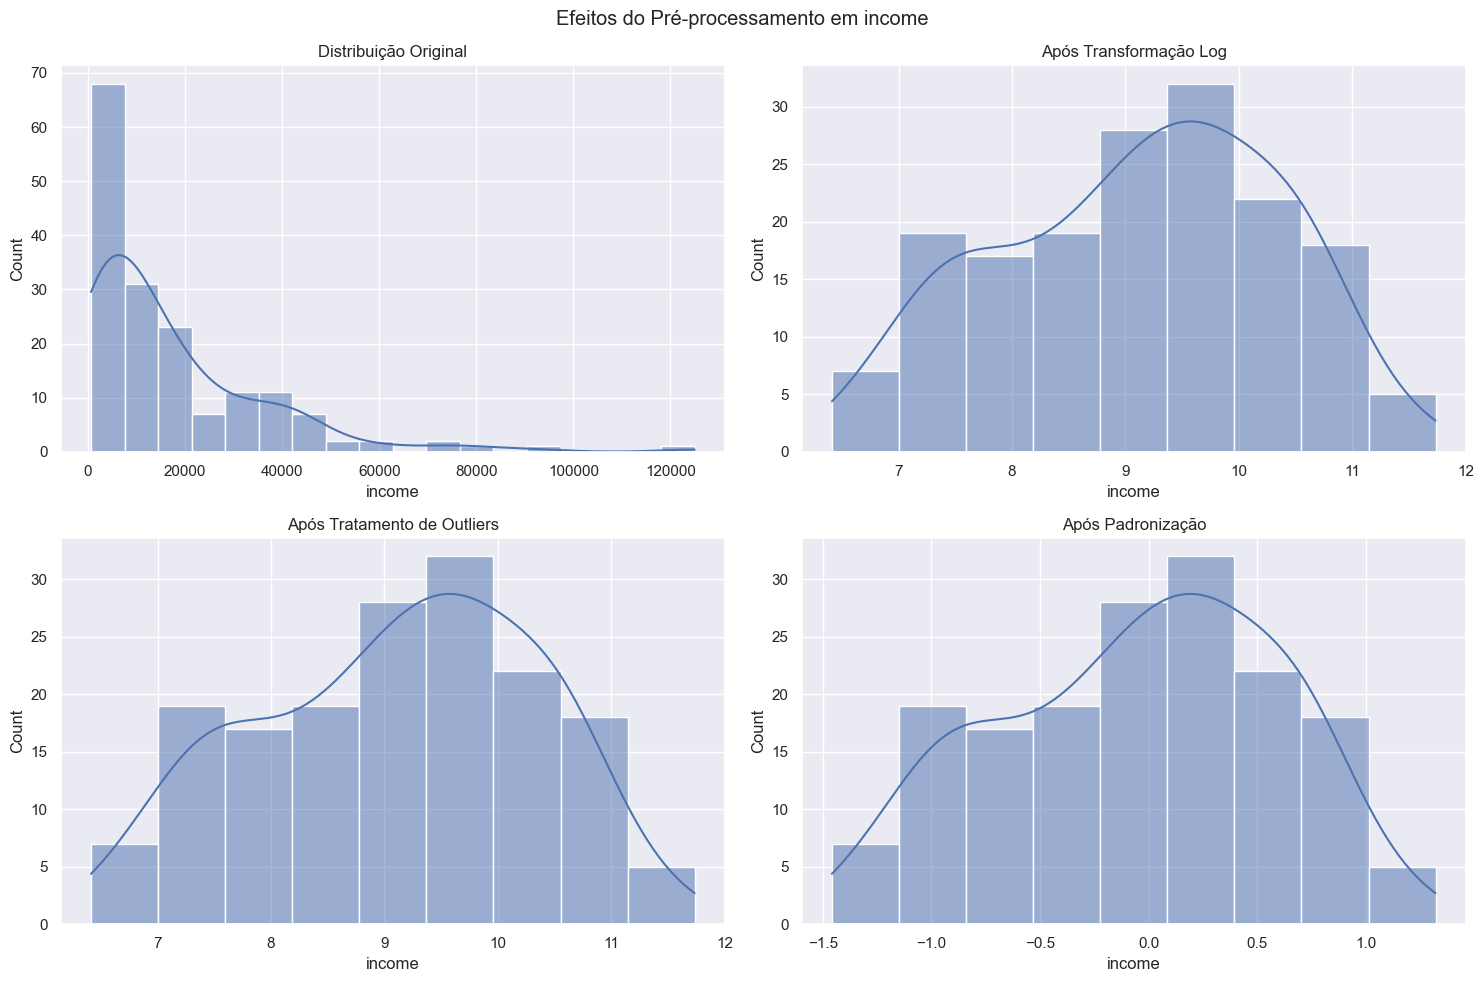

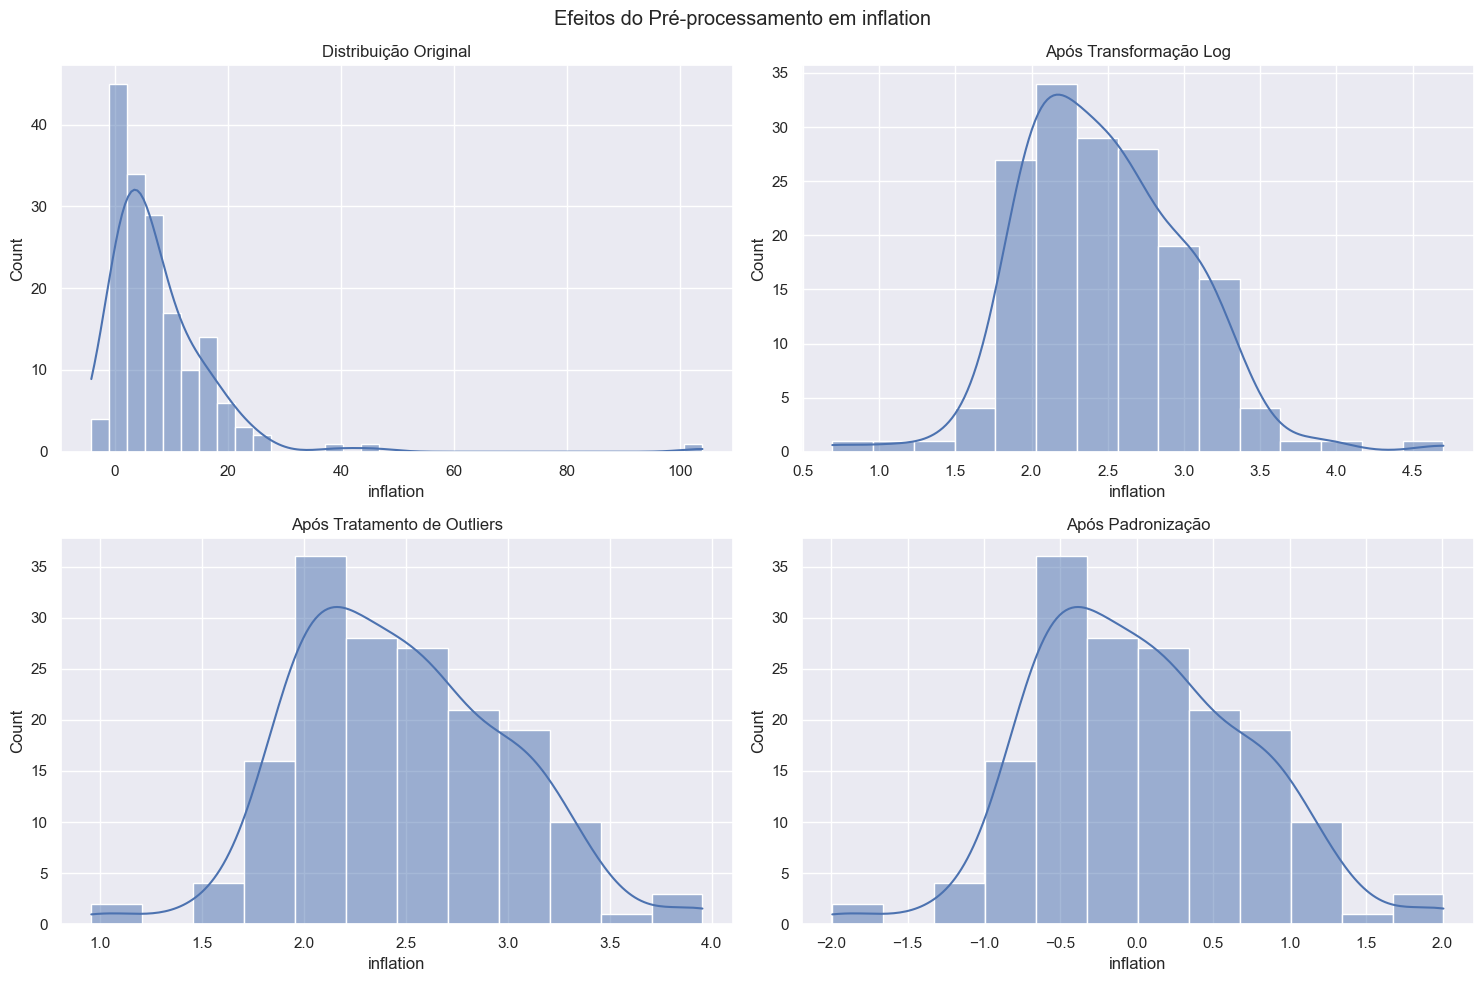

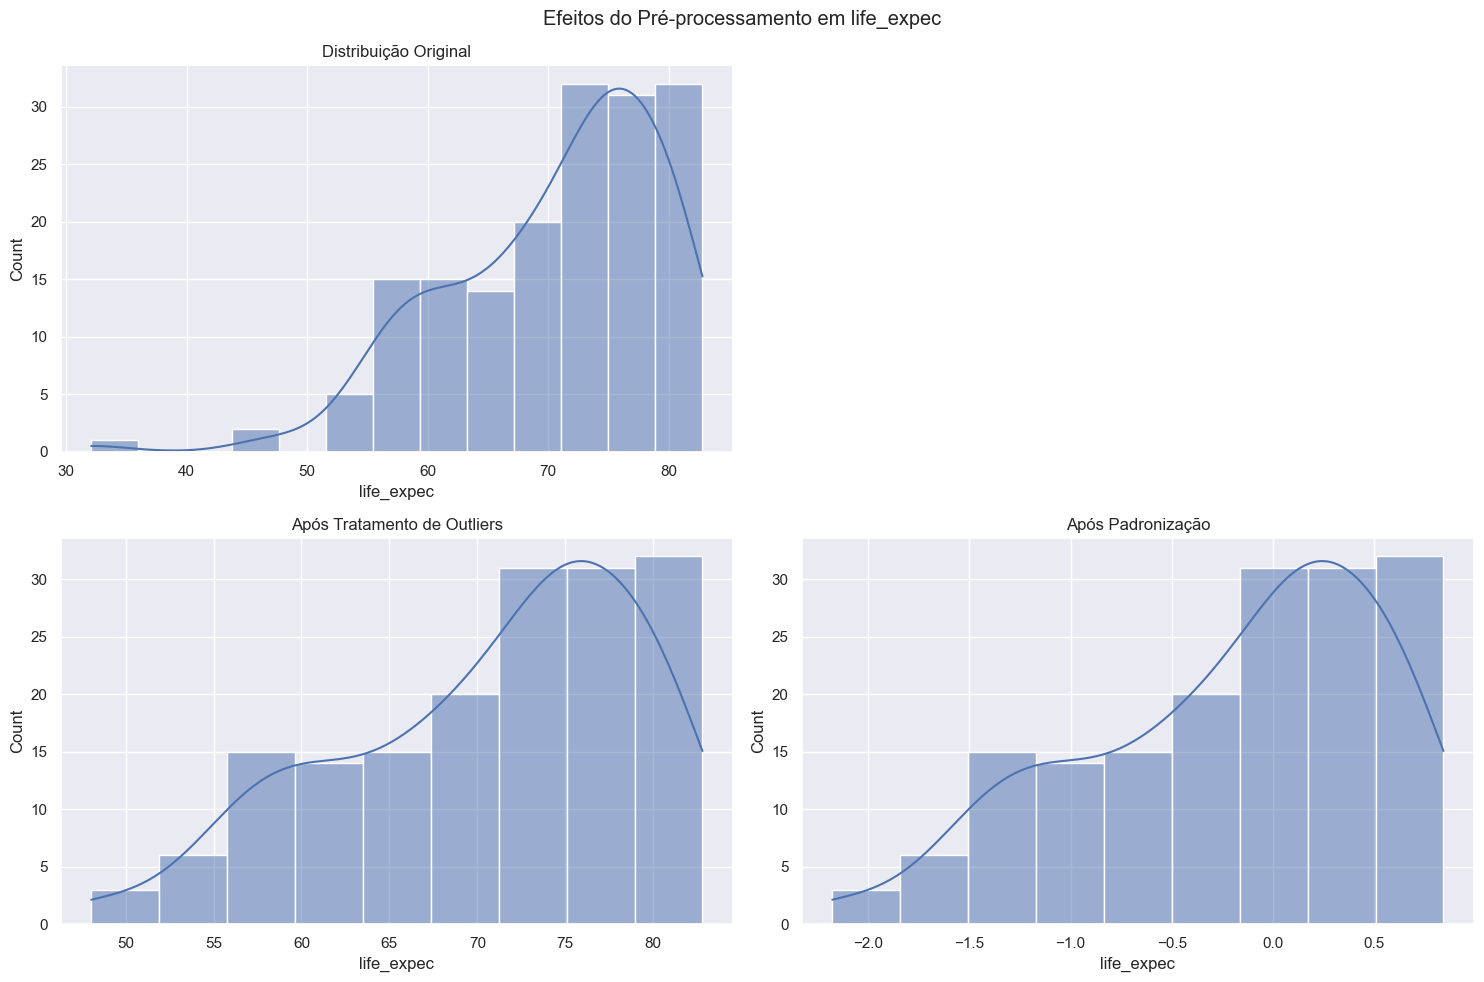

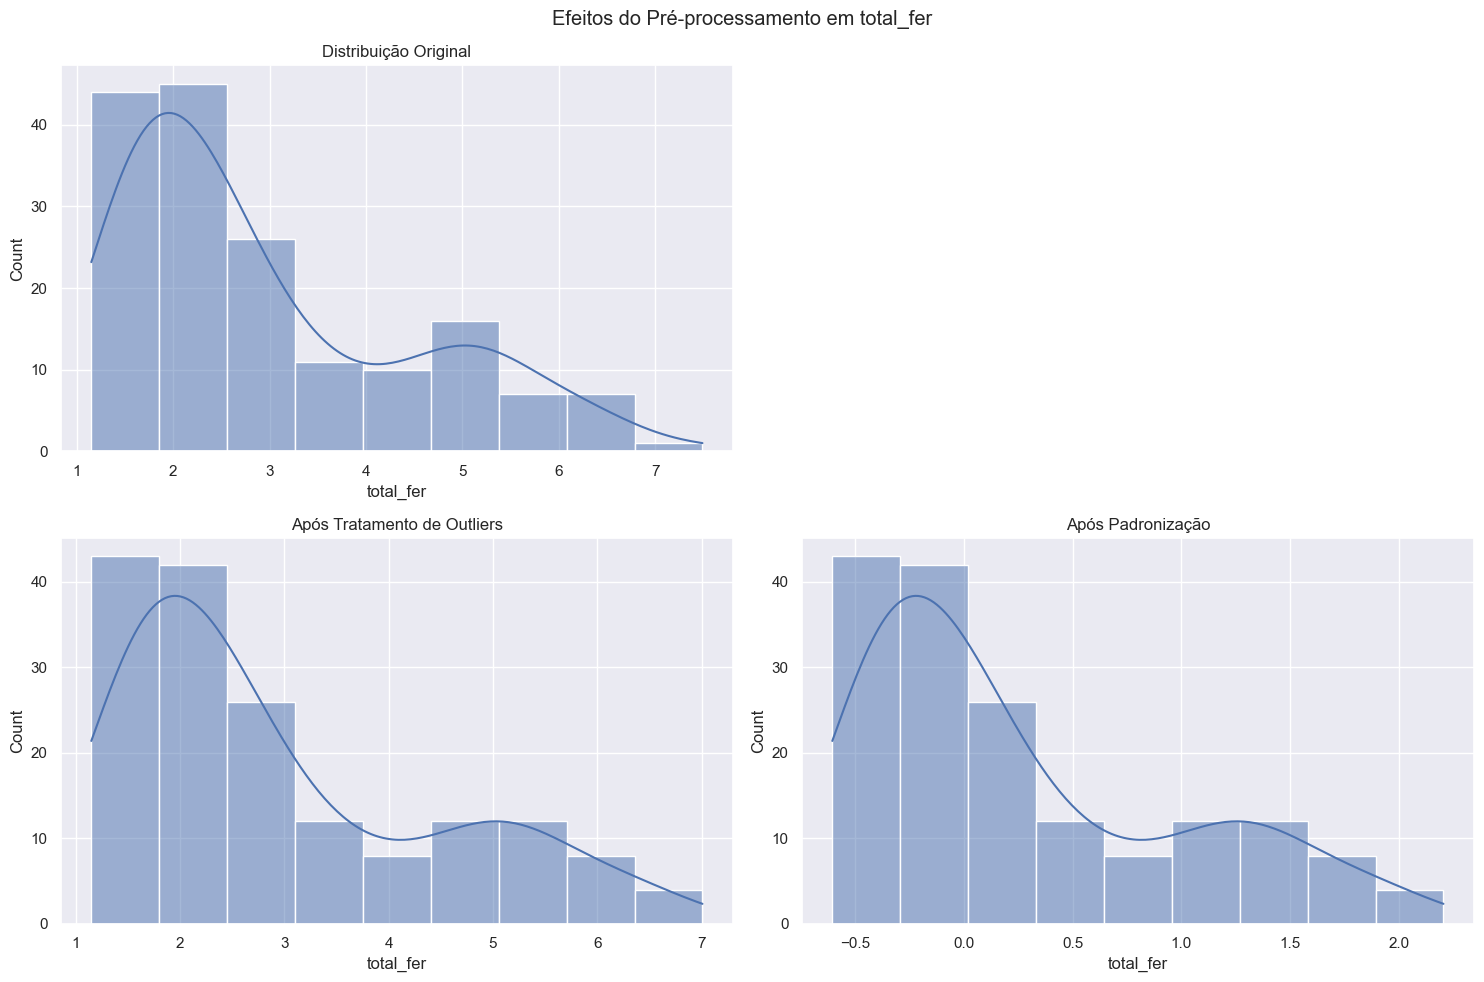

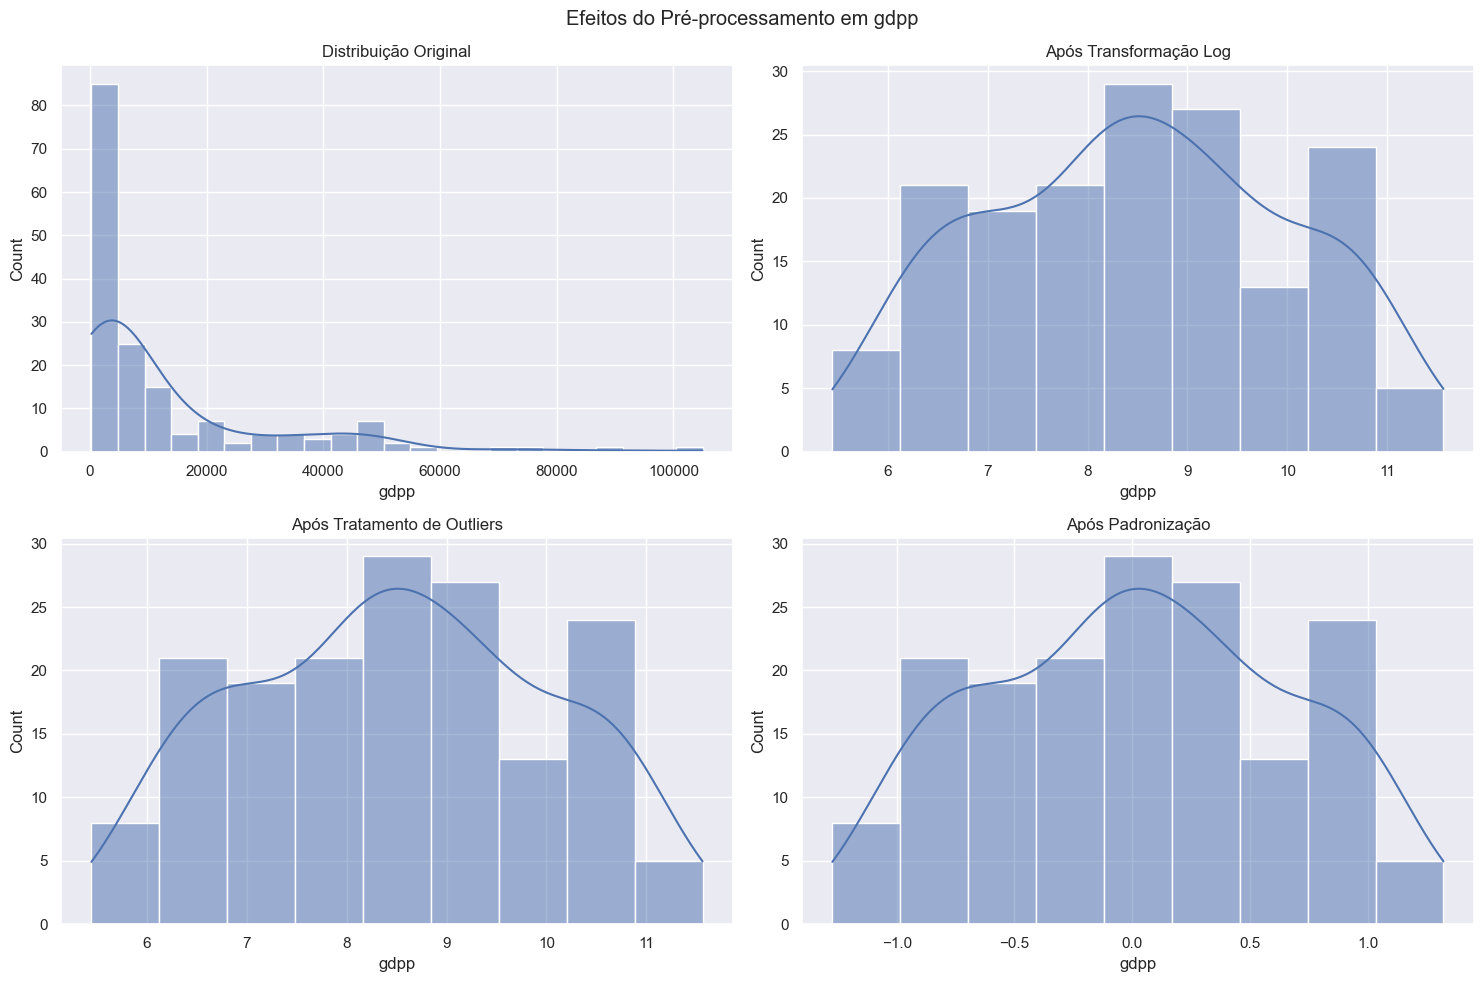


Estatísticas após pré-processamento:

Assimetria final:
child_mort    1.20
exports      -0.15
health        0.48
imports      -0.08
income       -0.24
inflation     0.28
life_expec   -0.66
total_fer     0.94
gdpp          0.01
dtype: float64

Curtose final:
child_mort    0.35
exports       0.08
health       -0.35
imports       0.22
income       -0.85
inflation     0.23
life_expec   -0.44
total_fer    -0.30
gdpp         -0.96
dtype: float64


In [180]:
# CÉLULA 4: Funções de Pré-processamento

def identify_skewed_variables(data, numerical_columns, threshold=1.5):
    """
    Identifica variáveis com alta assimetria
    """
    skewness = data[numerical_columns].skew()
    high_skew_cols = skewness[abs(skewness) > threshold].index.tolist()
    
    print("\nVariáveis com alta assimetria (>1.5):")
    for col in high_skew_cols:
        print(f"{col}: {skewness[col]:.2f}")
    
    return high_skew_cols

def transform_skewed_features(data, skewed_columns):
    """
    Aplica transformação logarítmica nas variáveis assimétricas
    """
    data_transformed = data.copy()
    
    for col in skewed_columns:
        # Verificar se há valores negativos
        min_val = data[col].min()
        if min_val <= 0:
            offset = abs(min_val) + 1
            data_transformed[col] = np.log1p(data[col] + offset)
        else:
            data_transformed[col] = np.log1p(data[col])
    
    return data_transformed

def treat_outliers(data, columns, factor=1.5):
    """
    Trata outliers usando o método IQR
    """
    data_clean = data.copy()
    outliers_summary = {}
    
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        # Contar outliers antes do tratamento
        outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_summary[col] = len(outliers)
        
        # Tratar outliers
        data_clean[col] = data_clean[col].clip(lower=lower_bound, upper=upper_bound)
    
    print("\nResumo dos outliers encontrados:")
    for col, count in outliers_summary.items():
        print(f"{col}: {count} outliers")
    
    return data_clean

def scale_features(data, columns):
    """
    Padroniza as variáveis usando RobustScaler
    """
    scaler = RobustScaler()
    data_scaled = pd.DataFrame(
        scaler.fit_transform(data[columns]),
        columns=columns,
        index=data.index
    )
    return data_scaled

def visualize_preprocessing_effects(original_data, transformed_data, cleaned_data, 
                                 scaled_data, columns, skewed_columns):
    """
    Visualiza o efeito de cada etapa do pré-processamento
    """
    for col in columns:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Efeitos do Pré-processamento em {col}')
        
        # Original
        sns.histplot(original_data[col], kde=True, ax=axes[0,0])
        axes[0,0].set_title('Distribuição Original')
        
        # Após transformação log (se aplicável)
        if col in skewed_columns:
            sns.histplot(transformed_data[col], kde=True, ax=axes[0,1])
            axes[0,1].set_title('Após Transformação Log')
        else:
            axes[0,1].set_visible(False)
        
        # Após tratamento de outliers
        sns.histplot(cleaned_data[col], kde=True, ax=axes[1,0])
        axes[1,0].set_title('Após Tratamento de Outliers')
        
        # Após padronização
        sns.histplot(scaled_data[col], kde=True, ax=axes[1,1])
        axes[1,1].set_title('Após Padronização')
        
        plt.tight_layout()
        plt.show()

# CÉLULA 5: Aplicação do Pré-processamento

def preprocess_data(df, numerical_columns):
    """
    Aplica todo o pipeline de pré-processamento
    """
    print("Iniciando pré-processamento dos dados...")
    
    # 1. Identificar variáveis assimétricas
    skewed_columns = identify_skewed_variables(df, numerical_columns)
    
    # 2. Transformar variáveis assimétricas
    data_transformed = transform_skewed_features(df, skewed_columns)
    
    # 3. Tratar outliers
    data_cleaned = treat_outliers(
        data_transformed if skewed_columns else df,
        numerical_columns
    )
    
    # 4. Padronizar os dados
    data_scaled = scale_features(data_cleaned, numerical_columns)
    
    # 5. Visualizar efeitos do pré-processamento
    visualize_preprocessing_effects(
        df, data_transformed, data_cleaned, data_scaled,
        numerical_columns, skewed_columns
    )
    
    # 6. Verificar qualidade do pré-processamento
    print("\nEstatísticas após pré-processamento:")
    print("\nAssimetria final:")
    print(data_scaled.skew().round(2))
    print("\nCurtose final:")
    print(data_scaled.kurtosis().round(2))
    
    return data_scaled

# Aplicar o pré-processamento
data_preprocessed = preprocess_data(df, numerical_columns)

# Salvar dados pré-processados para uso posterior
data_preprocessed.to_csv('data_preprocessed.csv', index=False)

Executando análise inicial com K-means e Hierárquico...
ANÁLISE DETALHADA DOS CLUSTERS K-MEANS

CLUSTER 0
------------------------------
Número de países: 69 (41.3%)

Distribuição das dimensões:
      child_mort  exports  health  imports    income  inflation  life_expec  \
mean       31.40    37.81    5.72    43.20  11648.70      10.52       70.25   
std        19.22    18.19    2.16    19.25  12084.44       8.27        5.21   
min         5.50     0.11    1.97     0.07   1780.00       0.48       54.30   
max       111.00    85.80   14.20    81.70  80600.00      45.90       78.20   

      total_fer      gdpp  
mean       2.72   5492.93  
std        0.86   5540.10  
min        1.27    592.00  
max        5.21  35300.00  

País mais representativo: Bolivia
Justificativa: Menor distância euclidiana ao centroide do cluster

Características distintivas (% em relação à média global):
child_mort:  -18.0%
exports:   -8.0%
health:  -16.0%
imports:   -7.9%
income:  -32.1%
inflation:   35.2%
lif

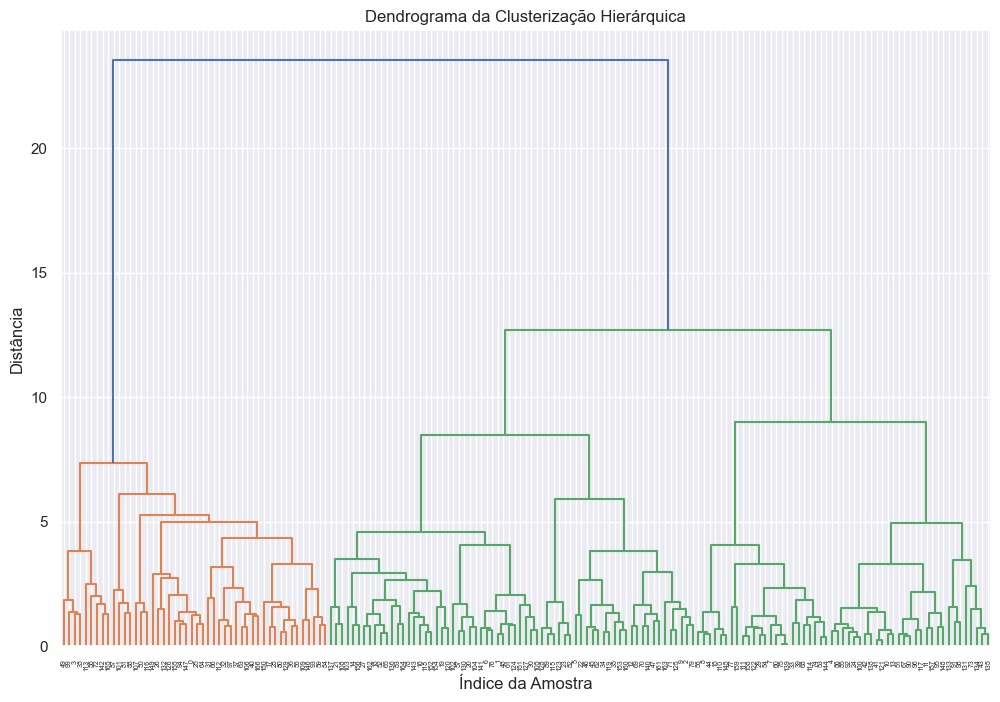


CLUSTER 0
------------------------------
Número de países: 48 (28.7%)

Países no cluster:
Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Micronesia, Fed. Sts., Mozambique, Myanmar, Nepal, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia

Médias das variáveis:
child_mort      91.89
exports         27.05
health           6.33
imports         42.21
income        3389.44
inflation       12.18
life_expec      60.04
total_fer        4.96
gdpp          1598.12
dtype: float64

CLUSTER 1
------------------------------
Número de países: 66 (39.5%)

Países no cluster:
Albania, Algeria, Argentina, Armenia, Azerbaijan, Bangladesh, Belarus, Belize, Bhutan, Boliv

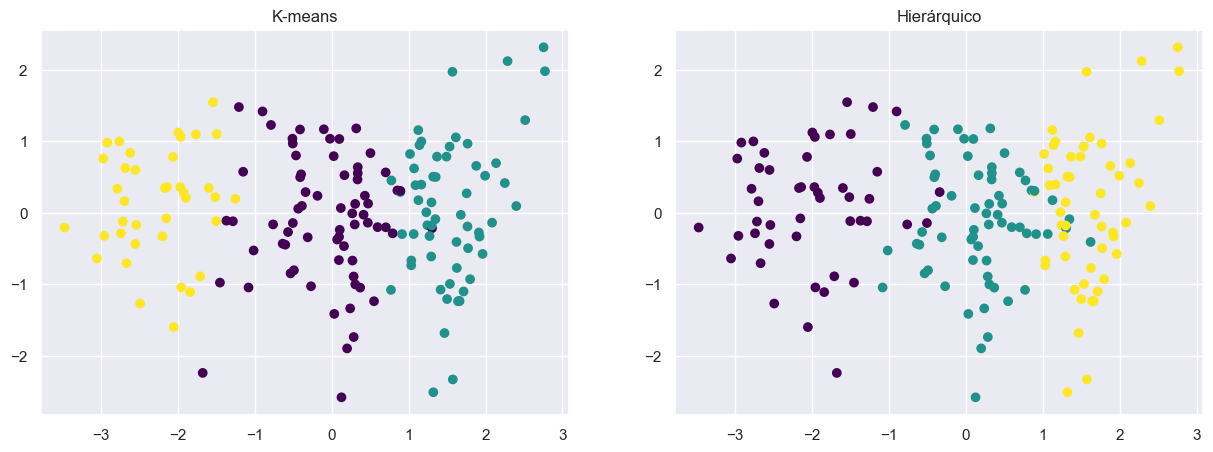


ETAPAS DO ALGORITMO K-MÉDIAS

    1. Inicialização:
       - Escolha aleatória de K centróides iniciais
       
    2. Atribuição:
       - Associar cada ponto ao centróide mais próximo
       - Formar clusters iniciais
       
    3. Atualização:
       - Calcular novo centróide (média) de cada cluster
       - Atualizar posição dos centróides
       
    4. Repetição:
       - Repetir passos 2 e 3 até convergência
       - Convergência: centróides não se movem significativamente
    


In [182]:
# CÉLULA 6: Análise K-means e Hierárquica
def analyze_kmeans_clusters(data, original_df, n_clusters=3):
    """
    Implementa e analisa K-means
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    
    print("ANÁLISE DETALHADA DOS CLUSTERS K-MEANS")
    print("="*50)
    
    # Analisar cada cluster
    for i in range(n_clusters):
        mask = labels == i
        cluster_data = original_df[mask]
        
        print(f"\nCLUSTER {i}")
        print("-"*30)
        
        # Tamanho do cluster
        print(f"Número de países: {sum(mask)} ({sum(mask)/len(labels)*100:.1f}%)")
        
        # Distribuição das dimensões
        print("\nDistribuição das dimensões:")
        stats = cluster_data[numerical_columns].agg(['mean', 'std', 'min', 'max'])
        print(stats.round(2))
        
        # Encontrar país mais representativo
        cluster_center = kmeans.cluster_centers_[i]
        distances = np.linalg.norm(data[mask] - cluster_center, axis=1)
        representative_idx = np.argmin(distances)
        representative_country = cluster_data.iloc[representative_idx]['country']
        
        print(f"\nPaís mais representativo: {representative_country}")
        print("Justificativa: Menor distância euclidiana ao centroide do cluster")
        
        # Características distintivas
        global_means = original_df[numerical_columns].mean()
        cluster_means = cluster_data[numerical_columns].mean()
        diff = ((cluster_means - global_means) / global_means * 100).round(2)
        
        print("\nCaracterísticas distintivas (% em relação à média global):")
        for col, pct in diff.items():
            print(f"{col}: {pct:>6.1f}%")
    
    return labels, kmeans

def analyze_hierarchical_clustering(data, original_df, n_clusters=3):
    """
    Implementa e analisa Clustering Hierárquico
    """
    print("\nANÁLISE DO CLUSTERING HIERÁRQUICO")
    print("="*50)
    
    # Calcular matriz de ligação
    linkage_matrix = linkage(data, method='ward')
    
    # Plotar dendrograma
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix)
    plt.title('Dendrograma da Clusterização Hierárquica')
    plt.xlabel('Índice da Amostra')
    plt.ylabel('Distância')
    plt.show()
    
    # Obter labels
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust') - 1
    
    # Analisar clusters
    for i in range(n_clusters):
        mask = labels == i
        cluster_data = original_df[mask]
        
        print(f"\nCLUSTER {i}")
        print("-"*30)
        print(f"Número de países: {sum(mask)} ({sum(mask)/len(labels)*100:.1f}%)")
        print("\nPaíses no cluster:")
        print(", ".join(cluster_data['country'].values))
        
        # Características do cluster
        cluster_means = cluster_data[numerical_columns].mean()
        print("\nMédias das variáveis:")
        print(cluster_means.round(2))
    
    return labels, linkage_matrix

def compare_methods(kmeans_labels, hierarchical_labels, data, original_df):
    """
    Compara os resultados dos dois métodos
    """
    print("\nCOMPARAÇÃO ENTRE K-MEANS E CLUSTERING HIERÁRQUICO")
    print("="*50)
    
    # Calcular concordância
    n_samples = len(kmeans_labels)
    agreement = sum(kmeans_labels == hierarchical_labels) / n_samples
    
    print(f"\nConcordância entre os métodos: {agreement*100:.1f}%")
    
    # Comparar distribuições
    kmeans_dist = pd.Series(kmeans_labels).value_counts()
    hier_dist = pd.Series(hierarchical_labels).value_counts()
    
    print("\nDistribuição dos clusters:")
    print("\nK-means:")
    print(kmeans_dist)
    print("\nHierárquico:")
    print(hier_dist)
    
    # Visualização comparativa
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # K-means
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    ax1.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='viridis')
    ax1.set_title('K-means')
    
    # Hierárquico
    ax2.scatter(data_2d[:, 0], data_2d[:, 1], c=hierarchical_labels, cmap='viridis')
    ax2.set_title('Hierárquico')
    
    plt.show()

def print_theoretical_explanations():
    """
    Imprime explicações teóricas sobre os algoritmos
    """
    print("\nETAPAS DO ALGORITMO K-MÉDIAS")
    print("="*50)
    print("""
    1. Inicialização:
       - Escolha aleatória de K centróides iniciais
       
    2. Atribuição:
       - Associar cada ponto ao centróide mais próximo
       - Formar clusters iniciais
       
    3. Atualização:
       - Calcular novo centróide (média) de cada cluster
       - Atualizar posição dos centróides
       
    4. Repetição:
       - Repetir passos 2 e 3 até convergência
       - Convergência: centróides não se movem significativamente
    """)
    

# Executar análise inicial com K-means e Hierárquico
print("Executando análise inicial com K-means e Hierárquico...")
kmeans_labels, kmeans_model = analyze_kmeans_clusters(data_preprocessed, df)
hier_labels, hier_matrix = analyze_hierarchical_clustering(data_preprocessed, df)
compare_methods(kmeans_labels, hier_labels, data_preprocessed, df)
print_theoretical_explanations()

Implementando K-medoids...


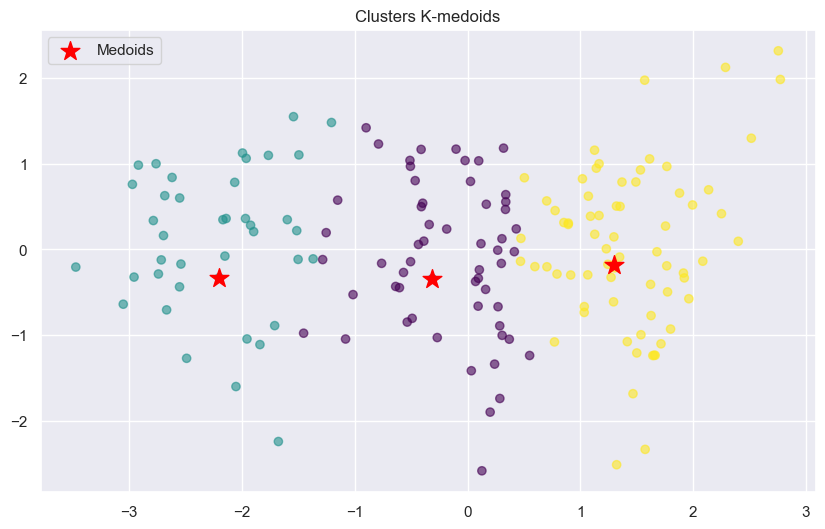


Principais diferenças entre K-means e K-medoids:

1. No K-means: 
   - O centro do cluster é a média dos pontos (centroide)
   - O centroide geralmente não é um ponto real do dataset

2. No K-medoids:
   - O centro do cluster é um ponto real do dataset (medoide)
   - O medoide é o ponto que minimiza a soma das distâncias aos outros pontos
   - Mais robusto a outliers por usar mediana em vez de média



In [183]:
def implement_kmedoids(data, n_clusters=3, max_iter=100):
    """
    Implementação do algoritmo K-medoids
    """
    print("Implementando K-medoids...")
    
    n_samples = len(data)
    
    # 1. Inicialização: escolher medoides iniciais aleatoriamente
    medoids_idx = np.random.choice(n_samples, n_clusters, replace=False)
    medoids = data[medoids_idx]
    best_cost = float('inf')
    best_medoids = None
    best_labels = None
    
    for _ in range(max_iter):
        # 2. Atribuir pontos ao medoide mais próximo
        distances = pairwise_distances(data, medoids)
        labels = np.argmin(distances, axis=1)
        
        # 3. Atualizar medoides
        current_cost = 0
        for cluster in range(n_clusters):
            cluster_points = data[labels == cluster]
            if len(cluster_points) > 0:
                # Calcular distância total para cada ponto do cluster
                cluster_distances = pairwise_distances(cluster_points)
                total_distances = cluster_distances.sum(axis=1)
                
                # Escolher o ponto com menor distância total como novo medoide
                new_medoid_idx = np.argmin(total_distances)
                medoids[cluster] = cluster_points[new_medoid_idx]
                current_cost += total_distances[new_medoid_idx]
        
        # 4. Verificar se melhorou
        if current_cost < best_cost:
            best_cost = current_cost
            best_medoids = medoids.copy()
            best_labels = labels.copy()
    
    return best_medoids, best_labels, best_cost

# Testar e visualizar resultados
medoids, labels, cost = implement_kmedoids(data_preprocessed.values)

# Visualizar resultados
plt.figure(figsize=(10, 6))
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_preprocessed)

# Plotar pontos e medoides
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
medoids_2d = pca.transform(medoids)
plt.scatter(medoids_2d[:, 0], medoids_2d[:, 1], 
           c='red', marker='*', s=200, label='Medoids')
plt.title('Clusters K-medoids')
plt.legend()
plt.show()

print("\nPrincipais diferenças entre K-means e K-medoids:")
print("""
1. No K-means: 
   - O centro do cluster é a média dos pontos (centroide)
   - O centroide geralmente não é um ponto real do dataset

2. No K-medoids:
   - O centro do cluster é um ponto real do dataset (medoide)
   - O medoide é o ponto que minimiza a soma das distâncias aos outros pontos
   - Mais robusto a outliers por usar mediana em vez de média
""")

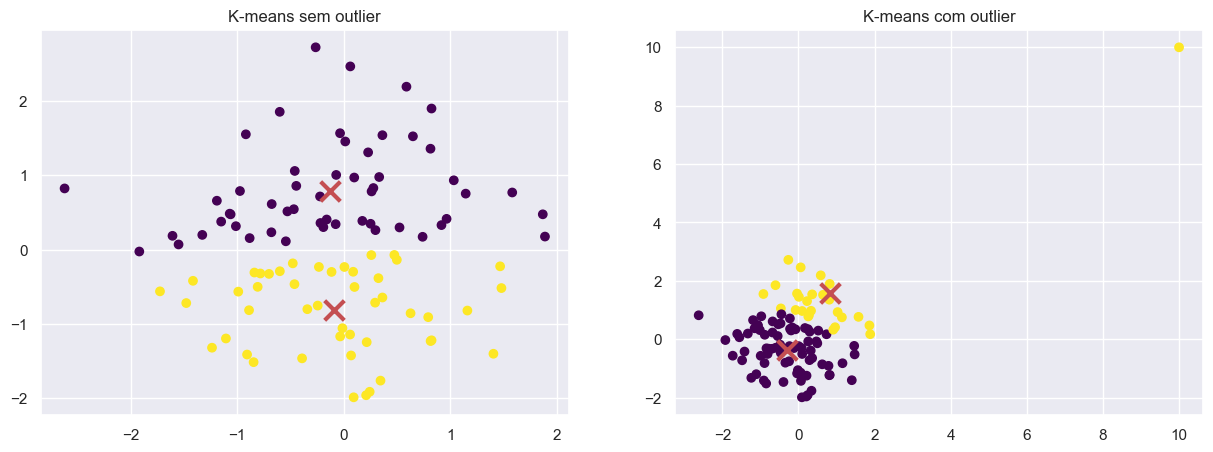


Por que K-means é sensível a outliers:

1. Uso da média como centro:
   - A média é fortemente influenciada por valores extremos
   - Um único outlier pode "puxar" significativamente o centroide

2. Efeito nos clusters:
   - Outliers podem distorcer a forma e tamanho dos clusters
   - Podem criar clusters artificiais ou unir clusters que deveriam estar separados

3. Impacto na convergência:
   - Outliers podem causar instabilidade na convergência
   - Podem levar a soluções sub-ótimas

4. Distorção da variância:
   - Outliers aumentam a variância total
   - Afetam a decisão de atribuição de pontos aos clusters



In [184]:
# Demonstração da sensibilidade a outliers
import numpy as np
import matplotlib.pyplot as plt

# Criar dados com outlier
np.random.seed(42)
X = np.random.normal(0, 1, (100, 2))
outlier = np.array([[10, 10]])  # Outlier significativo
X_with_outlier = np.vstack([X, outlier])

# Aplicar K-means com e sem outlier
kmeans_normal = KMeans(n_clusters=2, random_state=42).fit(X)
kmeans_outlier = KMeans(n_clusters=2, random_state=42).fit(X_with_outlier)

# Visualizar resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Sem outlier
ax1.scatter(X[:, 0], X[:, 1], c=kmeans_normal.labels_, cmap='viridis')
ax1.scatter(kmeans_normal.cluster_centers_[:, 0], 
           kmeans_normal.cluster_centers_[:, 1], 
           marker='x', s=200, linewidths=3, color='r', label='Centroids')
ax1.set_title('K-means sem outlier')

# Com outlier
ax2.scatter(X_with_outlier[:, 0], X_with_outlier[:, 1], 
           c=kmeans_outlier.labels_, cmap='viridis')
ax2.scatter(kmeans_outlier.cluster_centers_[:, 0], 
           kmeans_outlier.cluster_centers_[:, 1], 
           marker='x', s=200, linewidths=3, color='r', label='Centroids')
ax2.set_title('K-means com outlier')

plt.show()

print("\nPor que K-means é sensível a outliers:")
print("""
1. Uso da média como centro:
   - A média é fortemente influenciada por valores extremos
   - Um único outlier pode "puxar" significativamente o centroide

2. Efeito nos clusters:
   - Outliers podem distorcer a forma e tamanho dos clusters
   - Podem criar clusters artificiais ou unir clusters que deveriam estar separados

3. Impacto na convergência:
   - Outliers podem causar instabilidade na convergência
   - Podem levar a soluções sub-ótimas

4. Distorção da variância:
   - Outliers aumentam a variância total
   - Afetam a decisão de atribuição de pontos aos clusters
""")

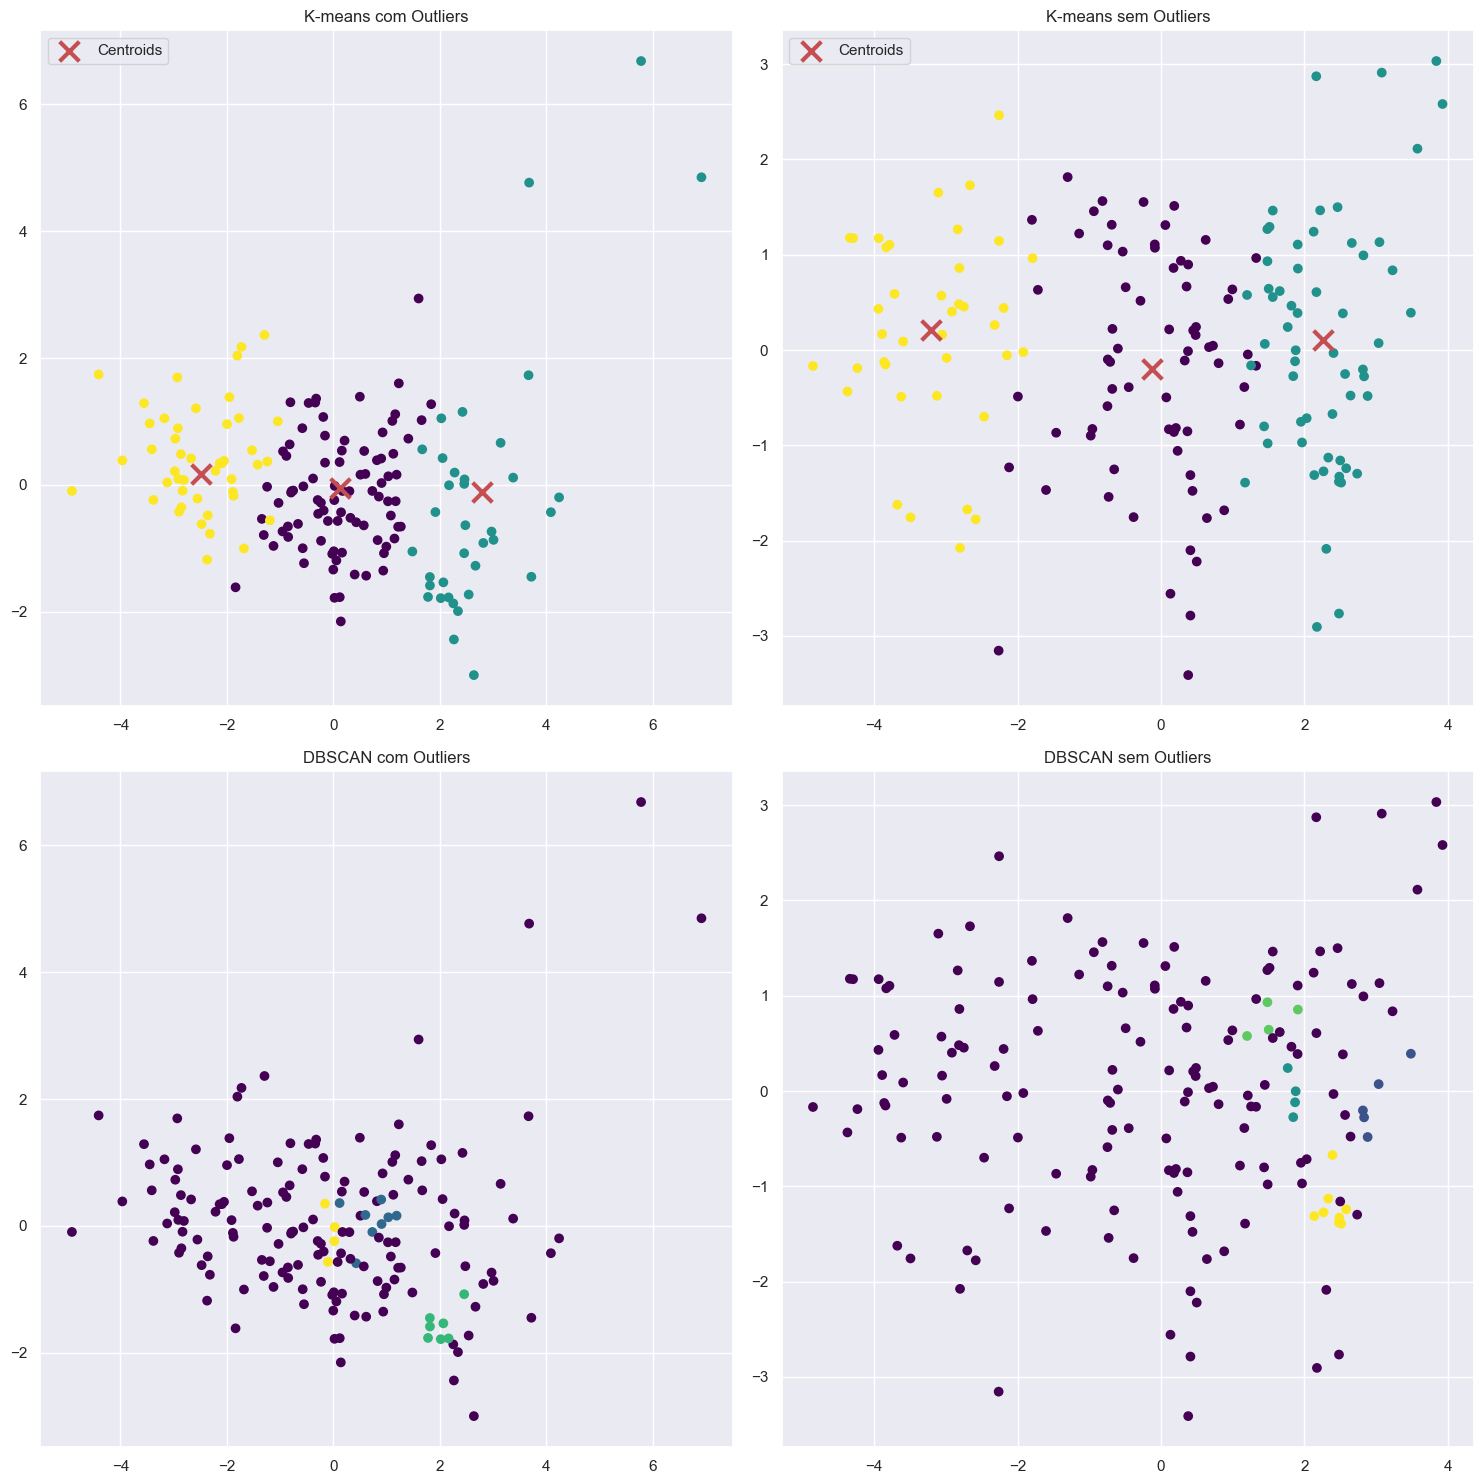

ANÁLISE COMPARATIVA DOS RESULTADOS

K-means:

Com outliers:

Cluster 0:
Número de países: 86
Desvio padrão das variáveis:
child_mort      14.08
exports         18.81
health           2.17
imports         19.92
income        8084.08
inflation        7.82
life_expec       4.30
total_fer        0.73
gdpp          4966.64
dtype: float64

Cluster 1:
Número de países: 36
Desvio padrão das variáveis:
child_mort        2.19
exports          41.93
health            3.18
imports          36.84
income        20852.02
inflation         4.08
life_expec        1.82
total_fer         0.37
gdpp          18991.08
dtype: float64

Cluster 2:
Número de países: 45
Desvio padrão das variáveis:
child_mort      32.42
exports         18.37
health           2.69
imports         18.04
income        5420.12
inflation       15.84
life_expec       6.47
total_fer        1.01
gdpp          2917.95
dtype: float64

Sem outliers:

Cluster 0:
Número de países: 69
Desvio padrão das variáveis:
child_mort    0.35
exports   

In [190]:
# Análise comparativa do impacto dos outliers nos dados originais e tratados

def compare_clustering_with_outliers(original_data, treated_data, numerical_columns):
    """
    Compara resultados de clustering com e sem outliers
    """
    # Padronizar dados para comparação justa
    scaler = StandardScaler()
    original_scaled = scaler.fit_transform(original_data[numerical_columns])
    treated_scaled = scaler.fit_transform(treated_data[numerical_columns])
    
    # Aplicar K-means
    kmeans_original = KMeans(n_clusters=3, random_state=42).fit(original_scaled)
    kmeans_treated = KMeans(n_clusters=3, random_state=42).fit(treated_scaled)
    
    # Aplicar DBSCAN
    dbscan_original = DBSCAN(eps=0.75, min_samples=4).fit(original_scaled)
    dbscan_treated = DBSCAN(eps=0.75, min_samples=4).fit(treated_scaled)
    
    # Visualização usando PCA
    pca = PCA(n_components=2)
    original_2d = pca.fit_transform(original_scaled)
    treated_2d = pca.fit_transform(treated_scaled)
    
    # Plotar resultados
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    
    # K-means original
    axes[0,0].scatter(original_2d[:, 0], original_2d[:, 1], 
                     c=kmeans_original.labels_, cmap='viridis')
    axes[0,0].scatter(pca.transform(kmeans_original.cluster_centers_)[:, 0],
                     pca.transform(kmeans_original.cluster_centers_)[:, 1],
                     marker='x', s=200, linewidths=3, color='r', label='Centroids')
    axes[0,0].set_title('K-means com Outliers')
    axes[0,0].legend()
    
    # K-means tratado
    axes[0,1].scatter(treated_2d[:, 0], treated_2d[:, 1], 
                     c=kmeans_treated.labels_, cmap='viridis')
    axes[0,1].scatter(pca.transform(kmeans_treated.cluster_centers_)[:, 0],
                     pca.transform(kmeans_treated.cluster_centers_)[:, 1],
                     marker='x', s=200, linewidths=3, color='r', label='Centroids')
    axes[0,1].set_title('K-means sem Outliers')
    axes[0,1].legend()
    
    # DBSCAN original
    axes[1,0].scatter(original_2d[:, 0], original_2d[:, 1], 
                     c=dbscan_original.labels_, cmap='viridis')
    axes[1,0].set_title('DBSCAN com Outliers')
    
    # DBSCAN tratado
    axes[1,1].scatter(treated_2d[:, 0], treated_2d[:, 1], 
                     c=dbscan_treated.labels_, cmap='viridis')
    axes[1,1].set_title('DBSCAN sem Outliers')
    
    plt.tight_layout()
    plt.show()
    
    # Análise estatística
    print("ANÁLISE COMPARATIVA DOS RESULTADOS")
    print("="*50)
    
    # K-means
    print("\nK-means:")
    print("\nCom outliers:")
    for i in range(3):
        mask = kmeans_original.labels_ == i
        print(f"\nCluster {i}:")
        print(f"Número de países: {sum(mask)}")
        print("Desvio padrão das variáveis:")
        print(original_data[numerical_columns][mask].std().round(2))
    
    print("\nSem outliers:")
    for i in range(3):
        mask = kmeans_treated.labels_ == i
        print(f"\nCluster {i}:")
        print(f"Número de países: {sum(mask)}")
        print("Desvio padrão das variáveis:")
        print(treated_data[numerical_columns][mask].std().round(2))
    
    # DBSCAN
    print("\nDBSCAN:")
    print("\nCom outliers:")
    n_clusters_original = len(set(dbscan_original.labels_)) - (1 if -1 in dbscan_original.labels_ else 0)
    n_noise_original = list(dbscan_original.labels_).count(-1)
    print(f"Número de clusters: {n_clusters_original}")
    print(f"Pontos de ruído: {n_noise_original}")
    
    print("\nSem outliers:")
    n_clusters_treated = len(set(dbscan_treated.labels_)) - (1 if -1 in dbscan_treated.labels_ else 0)
    n_noise_treated = list(dbscan_treated.labels_).count(-1)
    print(f"Número de clusters: {n_clusters_treated}")
    print(f"Pontos de ruído: {n_noise_treated}")
    
    # Identificar países outliers
    print("\nPaíses identificados como outliers:")
    original_outliers = np.where((dbscan_original.labels_ == -1) & 
                               (dbscan_treated.labels_ != -1))[0]
    print("\nPaíses que eram outliers e foram corrigidos:")
    for idx in original_outliers:
        print(f"{df['country'].iloc[idx]}:")
        for col in numerical_columns:
            original_val = original_data[col].iloc[idx]
            treated_val = treated_data[col].iloc[idx]
            if original_val != treated_val:
                print(f"  {col}: {original_val:.2f} -> {treated_val:.2f}")

# Executar análise
# Usar os dados originais do DataFrame
original_data = df.copy()
treated_data = data_preprocessed.copy()  # Dados já tratados anteriormente

compare_clustering_with_outliers(original_data, treated_data, numerical_columns)

Calculando métricas para diferentes números de clusters...
Avaliando k=2
Avaliando k=3
Avaliando k=4
Avaliando k=5
Avaliando k=6
Avaliando k=7
Avaliando k=8
Avaliando k=9
Avaliando k=10


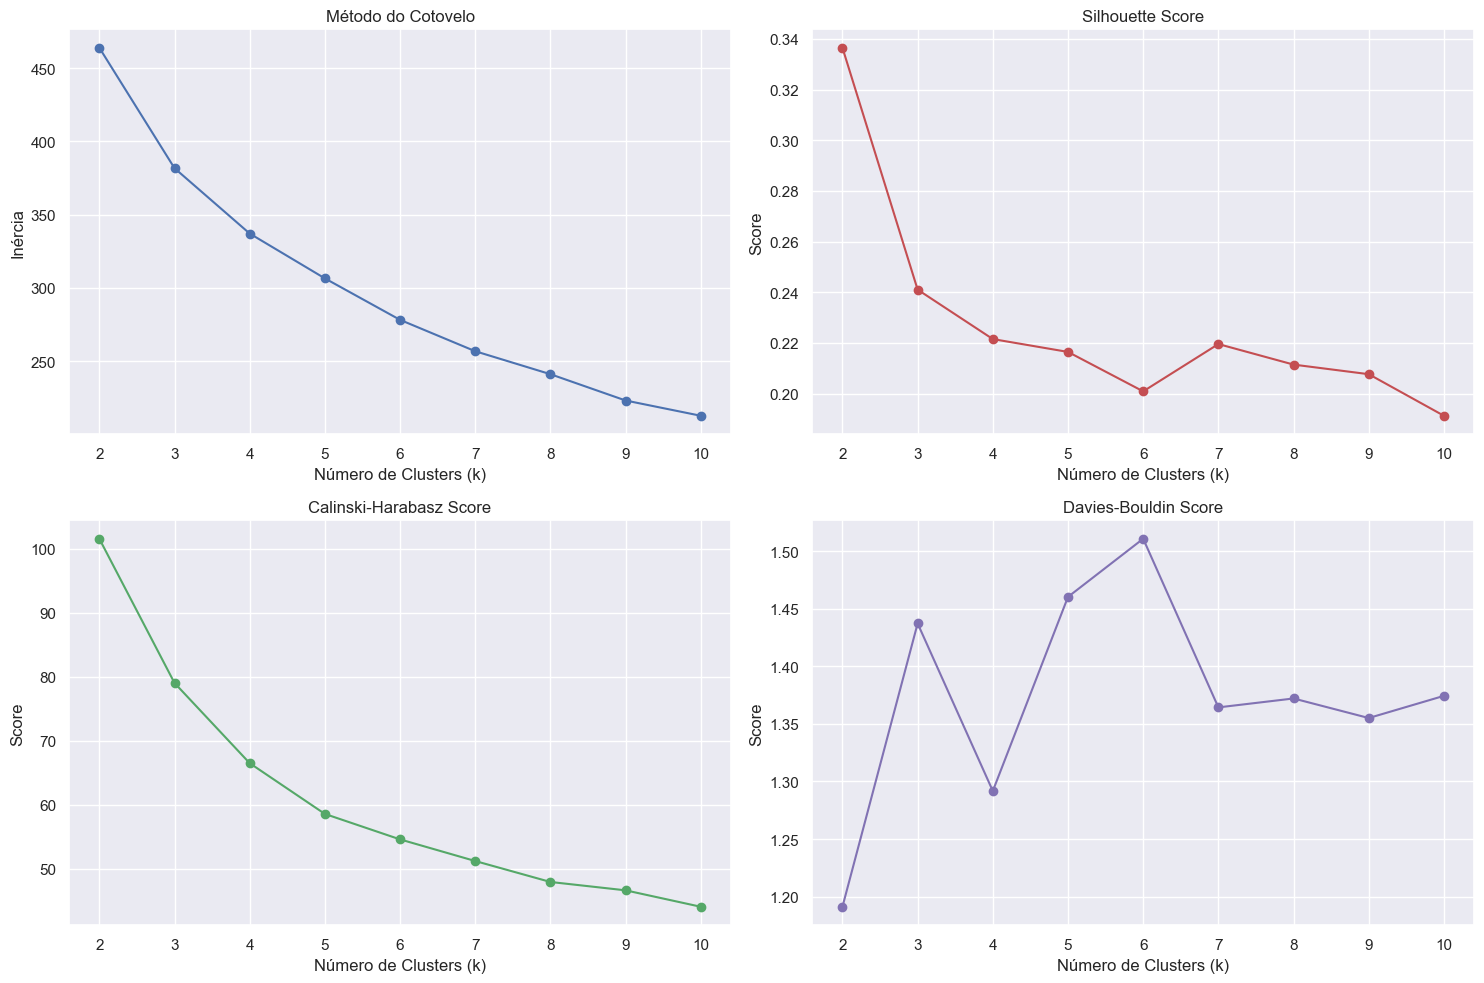


Número ótimo de clusters segundo diferentes métricas:
Método do Cotovelo: 4
Silhouette Score: 2
Calinski-Harabasz: 2
Davies-Bouldin: 2

Tabela completa de métricas:
    k  silhouette  calinski  davies_bouldin  inertia
0   2       0.337   101.568           1.191  463.970
1   3       0.241    79.027           1.437  381.705
2   4       0.222    66.492           1.292  337.073
3   5       0.216    58.561           1.460  306.453
4   6       0.201    54.582           1.511  278.125
5   7       0.220    51.201           1.364  256.700
6   8       0.211    47.928           1.372  241.016
7   9       0.208    46.622           1.355  223.048
8  10       0.191    44.053           1.374  212.623


In [191]:
# CÉLULA 6: Funções para Análise do Número Ótimo de Clusters

def calculate_clustering_metrics(data, k_range):
    """
    Calcula diferentes métricas para avaliar o número ótimo de clusters
    """
    metrics = {
        'k': [],
        'silhouette': [],
        'calinski': [],
        'davies_bouldin': [],
        'inertia': []
    }
    
    print("Calculando métricas para diferentes números de clusters...")
    
    for k in k_range:
        print(f"Avaliando k={k}")
        
        # Aplicar K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        
        # Calcular métricas
        metrics['k'].append(k)
        metrics['silhouette'].append(silhouette_score(data, labels))
        metrics['calinski'].append(calinski_harabasz_score(data, labels))
        metrics['davies_bouldin'].append(davies_bouldin_score(data, labels))
        metrics['inertia'].append(kmeans.inertia_)
    
    return pd.DataFrame(metrics)

def plot_metrics(metrics):
    """
    Plota os resultados das diferentes métricas
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Método do Cotovelo
    axes[0,0].plot(metrics['k'], metrics['inertia'], 'bo-')
    axes[0,0].set_title('Método do Cotovelo')
    axes[0,0].set_xlabel('Número de Clusters (k)')
    axes[0,0].set_ylabel('Inércia')
    axes[0,0].grid(True)
    
    # Silhouette Score
    axes[0,1].plot(metrics['k'], metrics['silhouette'], 'ro-')
    axes[0,1].set_title('Silhouette Score')
    axes[0,1].set_xlabel('Número de Clusters (k)')
    axes[0,1].set_ylabel('Score')
    axes[0,1].grid(True)
    
    # Calinski-Harabasz
    axes[1,0].plot(metrics['k'], metrics['calinski'], 'go-')
    axes[1,0].set_title('Calinski-Harabasz Score')
    axes[1,0].set_xlabel('Número de Clusters (k)')
    axes[1,0].set_ylabel('Score')
    axes[1,0].grid(True)
    
    # Davies-Bouldin
    axes[1,1].plot(metrics['k'], metrics['davies_bouldin'], 'mo-')
    axes[1,1].set_title('Davies-Bouldin Score')
    axes[1,1].set_xlabel('Número de Clusters (k)')
    axes[1,1].set_ylabel('Score')
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.show()

def find_optimal_k(metrics):
    """
    Determina o número ótimo de clusters baseado nas diferentes métricas
    """
    # Método do cotovelo usando "second derivative"
    k_elbow = find_elbow_point(metrics['k'], metrics['inertia'])
    
    # Melhor Silhouette Score (maior valor)
    k_silhouette = metrics.loc[metrics['silhouette'].idxmax(), 'k']
    
    # Melhor Calinski-Harabasz (maior valor)
    k_calinski = metrics.loc[metrics['calinski'].idxmax(), 'k']
    
    # Melhor Davies-Bouldin (menor valor)
    k_davies = metrics.loc[metrics['davies_bouldin'].idxmin(), 'k']
    
    print("\nNúmero ótimo de clusters segundo diferentes métricas:")
    print(f"Método do Cotovelo: {k_elbow}")
    print(f"Silhouette Score: {k_silhouette}")
    print(f"Calinski-Harabasz: {k_calinski}")
    print(f"Davies-Bouldin: {k_davies}")
    
    return {
        'elbow': k_elbow,
        'silhouette': k_silhouette,
        'calinski': k_calinski,
        'davies': k_davies
    }

def find_elbow_point(x, y):
    """
    Encontra o ponto de cotovelo usando o método da máxima curvatura
    """
    # Normalizar os dados
    x = np.array(x)
    y = np.array(y)
    x_norm = (x - x.min()) / (x.max() - x.min())
    y_norm = (y - y.min()) / (y.max() - y.min())
    
    # Calcular a curvatura
    nPoints = len(x_norm)
    allCoords = np.vstack((x_norm, y_norm)).T
    firstPoint = allCoords[0]
    lineVec = allCoords[-1] - allCoords[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    vecFromFirst = allCoords - firstPoint
    scalarProduct = np.sum(vecFromFirst * lineVecNorm, axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    
    # Encontrar o ponto de máxima curvatura
    elbow_index = np.argmax(distToLine)
    return x[elbow_index]

# CÉLULA 7: Aplicação da Análise de Clusters

# Definir range de k para testar
k_range = range(2, 11)

# Calcular métricas
metrics = calculate_clustering_metrics(data_preprocessed, k_range)

# Plotar resultados
plot_metrics(metrics)

# Encontrar k ótimo
optimal_k = find_optimal_k(metrics)

# Mostrar tabela com todos os resultados
print("\nTabela completa de métricas:")
print(metrics.round(3))


Executando K-means...

Executando K-medoids...

Executando Clustering Hierárquico...


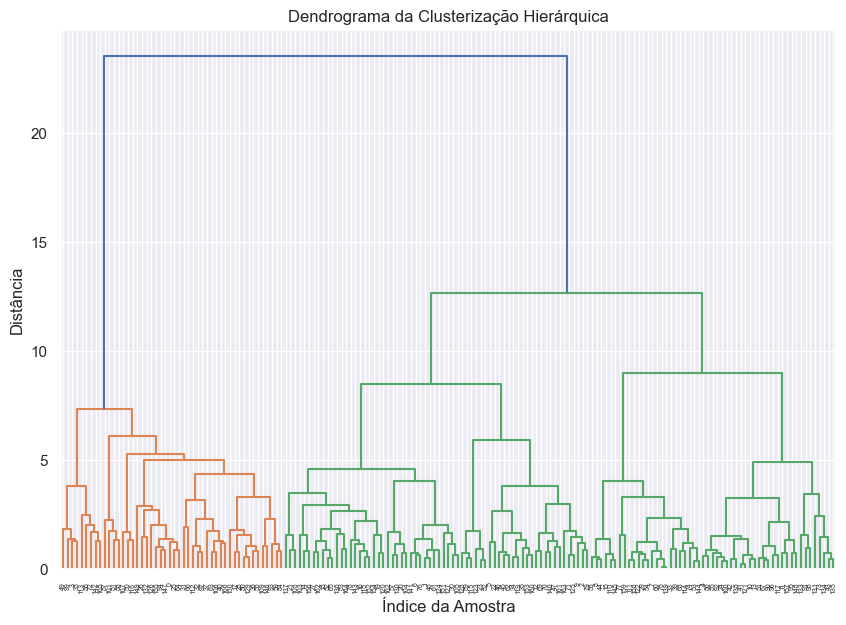


Executando DBSCAN...


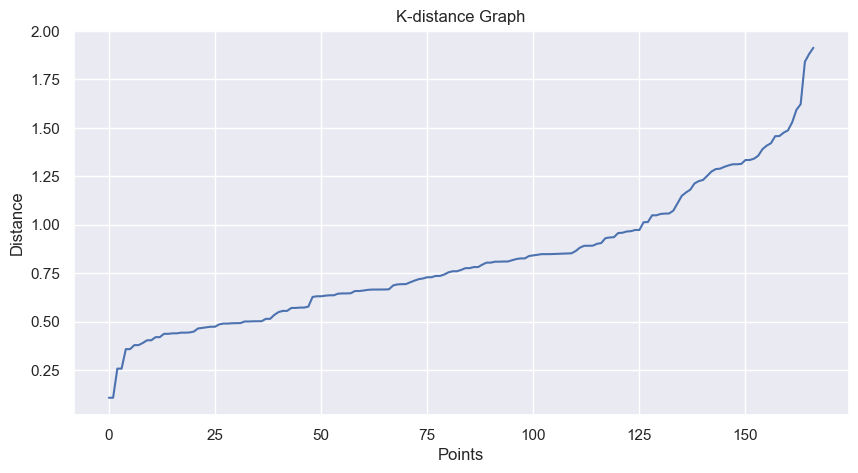

Eps estimado: 0.973
Número de clusters encontrados: 3
Número de pontos de ruído: 53


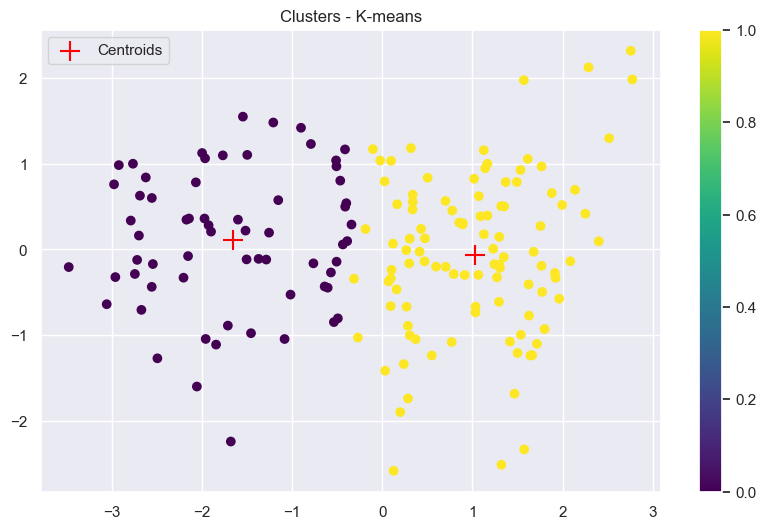


Análise dos Clusters - K-means

Cluster 0:
Número de países: 64

Países representativos:
Afghanistan, Angola, Bangladesh, Benin, Bolivia

Características médias:
child_mort      78.64
exports         29.23
health           6.14
imports         43.04
income        4055.83
inflation       11.56
life_expec      61.46
total_fer        4.48
gdpp          1890.06
dtype: float64

Desvio em relação à média global (%):
child_mort    105.50
exports       -28.89
health         -9.92
imports        -8.21
income        -76.34
inflation      48.55
life_expec    -12.89
total_fer      52.09
gdpp          -85.42
dtype: float64

Cluster 1:
Número de países: 103

Países representativos:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

Características médias:
child_mort       13.18
exports          48.49
health            7.24
imports          49.28
income        25277.57
inflation         5.43
life_expec       76.20
total_fer         1.99
gdpp          19845.15
dtype: float64

Desvio em relaçã

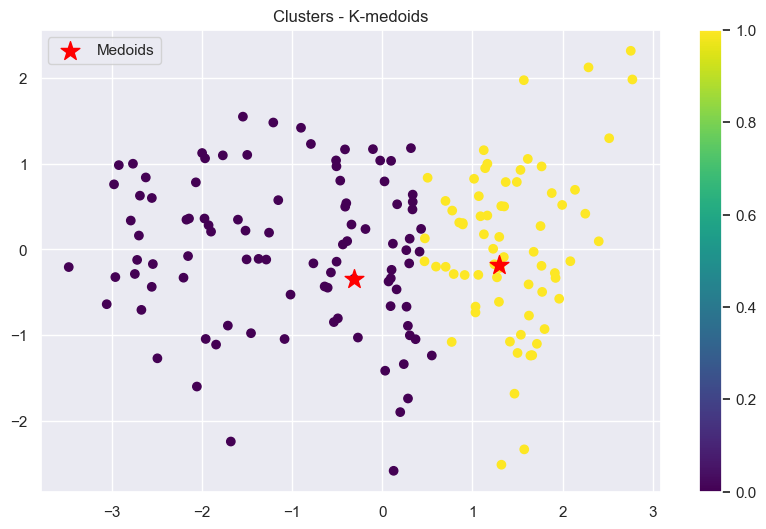


Análise dos Clusters - K-medoids

Cluster 0:
Número de países: 97

Países representativos:
Afghanistan, Algeria, Angola, Argentina, Armenia

Características médias:
child_mort      59.97
exports         31.24
health           6.11
imports         42.67
income        6203.43
inflation       10.98
life_expec      65.35
total_fer        3.76
gdpp          2996.33
dtype: float64

Desvio em relação à média global (%):
child_mort    56.70
exports      -24.00
health       -10.29
imports       -9.00
income       -63.82
inflation     41.05
life_expec    -7.38
total_fer     27.55
gdpp         -76.89
dtype: float64

Cluster 1:
Número de países: 70

Países representativos:
Albania, Antigua and Barbuda, Australia, Austria, Bahamas

Características médias:
child_mort        8.20
exports          54.78
health            7.79
imports          52.74
income        32306.14
inflation         3.36
life_expec       77.77
total_fer         1.82
gdpp          26776.71
dtype: float64

Desvio em relação à méd

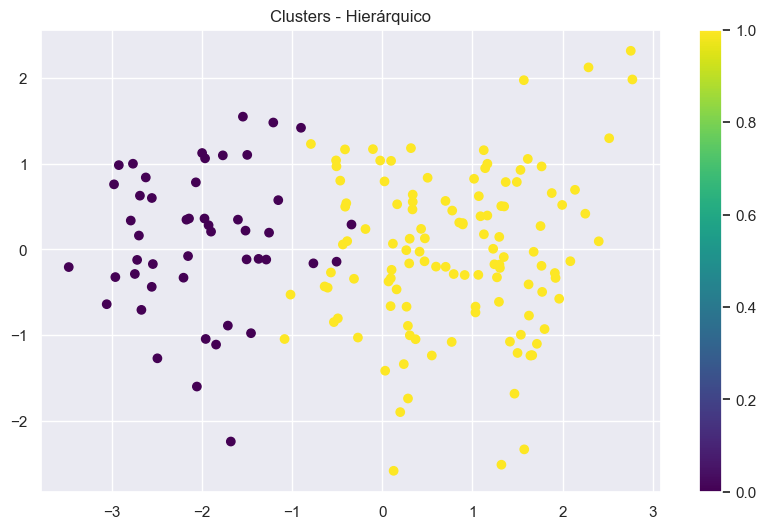


Análise dos Clusters - Hierárquico

Cluster 0:
Número de países: 48

Países representativos:
Afghanistan, Angola, Benin, Burkina Faso, Burundi

Características médias:
child_mort      91.89
exports         27.05
health           6.33
imports         42.21
income        3389.44
inflation       12.18
life_expec      60.04
total_fer        4.96
gdpp          1598.12
dtype: float64

Desvio em relação à média global (%):
child_mort    140.11
exports       -34.21
health         -7.19
imports        -9.99
income        -80.23
inflation      56.49
life_expec    -14.90
total_fer      68.41
gdpp          -87.67
dtype: float64

Cluster 1:
Número de países: 119

Países representativos:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

Características médias:
child_mort       16.64
exports          46.78
health            7.01
imports          48.78
income        22693.03
inflation         6.01
life_expec       74.80
total_fer         2.13
gdpp          17548.77
dtype: float64

Desvio em 

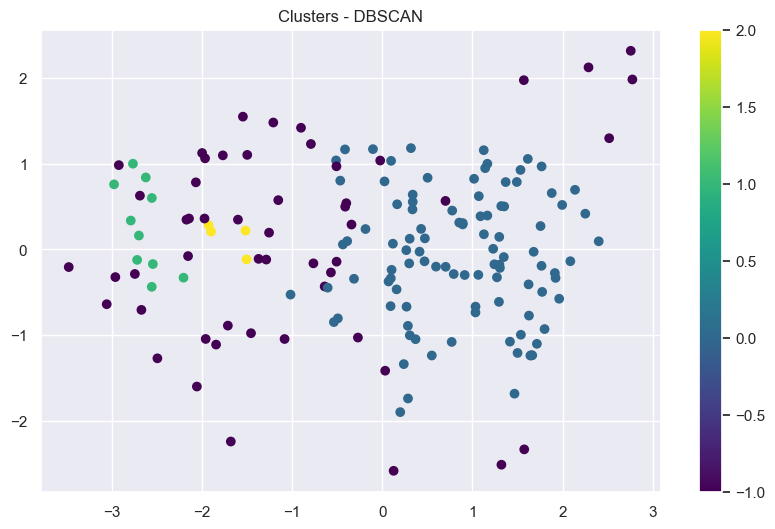


Análise dos Clusters - DBSCAN

Cluster 0:
Número de países: 100

Países representativos:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

Características médias:
child_mort       15.40
exports          43.84
health            7.03
imports          45.86
income        22407.00
inflation         5.46
life_expec       75.41
total_fer         2.09
gdpp          16981.56
dtype: float64

Desvio em relação à média global (%):
child_mort   -59.76
exports        6.64
health         3.09
imports       -2.19
income        30.69
inflation    -29.89
life_expec     6.88
total_fer    -28.98
gdpp          30.99
dtype: float64

Cluster 1:
Número de países: 10

Países representativos:
Burkina Faso, Chad, Guinea, Guinea-Bissau, Malawi

Características médias:
child_mort     109.34
exports         23.63
health           6.17
imports         37.45
income        1420.20
inflation        7.88
life_expec      57.00
total_fer        5.93
gdpp           589.80
dtype: float64

Desvio em relação à médi

In [192]:
# CÉLULA 8: Implementação dos Algoritmos de Clustering

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA

def implement_kmeans(data, n_clusters):
    """
    Implementa o K-means e retorna resultados detalhados
    """
    print("\nExecutando K-means...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    
    results = {
        'labels': labels,
        'centroids': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'n_iter': kmeans.n_iter_
    }
    
    return results

def implement_kmedoids(data, n_clusters):
    """
    Implementa o K-medoids (PAM) com inicialização inteligente
    """
    print("\nExecutando K-medoids...")
    
    def calculate_distance_matrix(data):
        return pairwise_distances(data)
    
    def find_initial_medoids(distance_matrix, n_clusters):
        n_samples = len(distance_matrix)
        medoids = [np.random.randint(n_samples)]
        
        while len(medoids) < n_clusters:
            distances = np.min([distance_matrix[m] for m in medoids], axis=0)
            next_medoid = np.argmax(distances)
            medoids.append(next_medoid)
        
        return medoids
    
    distance_matrix = calculate_distance_matrix(data)
    current_medoids = find_initial_medoids(distance_matrix, n_clusters)
    best_cost = float('inf')
    best_medoids = None
    best_labels = None
    
    for _ in range(100):  # número máximo de iterações
        # Atribuir pontos aos clusters
        labels = np.argmin([distance_matrix[m] for m in current_medoids], axis=0)
        
        # Atualizar medoids
        current_cost = 0
        for i in range(n_clusters):
            cluster_points = np.where(labels == i)[0]
            if len(cluster_points) > 0:
                cluster_distances = distance_matrix[cluster_points][:, cluster_points]
                total_distances = cluster_distances.sum(axis=1)
                new_medoid_idx = cluster_points[np.argmin(total_distances)]
                current_medoids[i] = new_medoid_idx
                current_cost += np.min(total_distances)
        
        if current_cost < best_cost:
            best_cost = current_cost
            best_medoids = current_medoids.copy()
            best_labels = labels.copy()
    
    return {'labels': best_labels, 'medoids': best_medoids, 'cost': best_cost}

def implement_hierarchical(data, n_clusters):
    """
    Implementa clustering hierárquico com método Ward
    """
    print("\nExecutando Clustering Hierárquico...")
    
    # Calcular matriz de ligação
    linkage_matrix = linkage(data, method='ward')
    
    # Obter labels
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust') - 1
    
    # Plotar dendrograma
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Dendrograma da Clusterização Hierárquica')
    plt.xlabel('Índice da Amostra')
    plt.ylabel('Distância')
    plt.show()
    
    return {'labels': labels, 'linkage_matrix': linkage_matrix}

def implement_dbscan(data):
    """
    Implementa DBSCAN com seleção automática de parâmetros
    """
    print("\nExecutando DBSCAN...")
    
    # Estimar eps usando o gráfico do cotovelo de k-nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=2)
    neighbors_fit = neighbors.fit(data)
    distances, _ = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:, 1])
    
    # Plotar gráfico para escolha do eps
    plt.figure(figsize=(10, 5))
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.show()
    
    # Encontrar "cotovelo" para eps
    knee = find_elbow_point(range(len(distances)), distances)
    eps = distances[int(knee)]
    
    print(f"Eps estimado: {eps:.3f}")
    
    # Executar DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(data)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f"Número de clusters encontrados: {n_clusters}")
    print(f"Número de pontos de ruído: {n_noise}")
    
    return {'labels': labels, 'eps': eps, 'n_clusters': n_clusters, 'n_noise': n_noise}


def visualize_clusters(data, labels, method_name, medoids=None, centroids=None):
    """
    Visualiza os clusters usando PCA
    """
    # Redução dimensional para visualização
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
    
    if medoids is not None:
        medoids_2d = pca.transform(data.iloc[medoids])
        plt.scatter(medoids_2d[:, 0], medoids_2d[:, 1], 
                   c='red', marker='*', s=200, label='Medoids')
    
    if centroids is not None:
        centroids_2d = pca.transform(centroids)
        plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
                   c='red', marker='+', s=200, label='Centroids')
    
    plt.title(f'Clusters - {method_name}')
    plt.colorbar(scatter)
    if medoids is not None or centroids is not None:
        plt.legend()
    plt.show()

def analyze_clusters(data, labels, original_data, method_name):
    """
    Análise detalhada dos clusters
    """
    print(f"\nAnálise dos Clusters - {method_name}")
    print("="*50)
    
    n_clusters = len(np.unique(labels[labels >= 0]))
    
    for i in range(n_clusters):
        cluster_mask = labels == i
        cluster_data = original_data[cluster_mask]
        
        print(f"\nCluster {i}:")
        print(f"Número de países: {sum(cluster_mask)}")
        print("\nPaíses representativos:")
        print(", ".join(cluster_data['country'].head().tolist()))
        
        print("\nCaracterísticas médias:")
        print(cluster_data[numerical_columns].mean().round(2))
        
        print("\nDesvio em relação à média global (%):")
        global_means = original_data[numerical_columns].mean()
        relative_diff = ((cluster_data[numerical_columns].mean() - global_means) / global_means * 100).round(2)
        print(relative_diff)

# CÉLULA 9: Aplicação e Comparação dos Métodos

# Número ótimo de clusters determinado anteriormente
n_clusters = optimal_k['silhouette']  # ou escolha baseada em outras métricas

# Executar todos os métodos
kmeans_results = implement_kmeans(data_preprocessed, n_clusters)
kmedoids_results = implement_kmedoids(data_preprocessed, n_clusters)
hierarchical_results = implement_hierarchical(data_preprocessed, n_clusters)
dbscan_results = implement_dbscan(data_preprocessed)

# Visualizar resultados
methods = {
    'K-means': kmeans_results['labels'],
    'K-medoids': kmedoids_results['labels'],
    'Hierárquico': hierarchical_results['labels'],
    'DBSCAN': dbscan_results['labels']
}

# Análise comparativa
for method_name, labels in methods.items():
    visualize_clusters(data_preprocessed, labels, method_name,
                      medoids=kmedoids_results['medoids'] if method_name == 'K-medoids' else None,
                      centroids=kmeans_results['centroids'] if method_name == 'K-means' else None)
    analyze_clusters(data_preprocessed, labels, df, method_name)

# Métricas de avaliação
print("\nMétricas de Avaliação dos Clusters:")
print("="*50)
for method_name, labels in methods.items():
    if -1 not in labels:  # Excluir DBSCAN noise points
        silhouette = silhouette_score(data_preprocessed, labels)
        calinski = calinski_harabasz_score(data_preprocessed, labels)
        davies = davies_bouldin_score(data_preprocessed, labels)
        
        print(f"\n{method_name}:")
        print(f"Silhouette Score: {silhouette:.3f}")
        print(f"Calinski-Harabasz Score: {calinski:.3f}")
        print(f"Davies-Bouldin Score: {davies:.3f}")

Testando diferentes combinações de parâmetros...


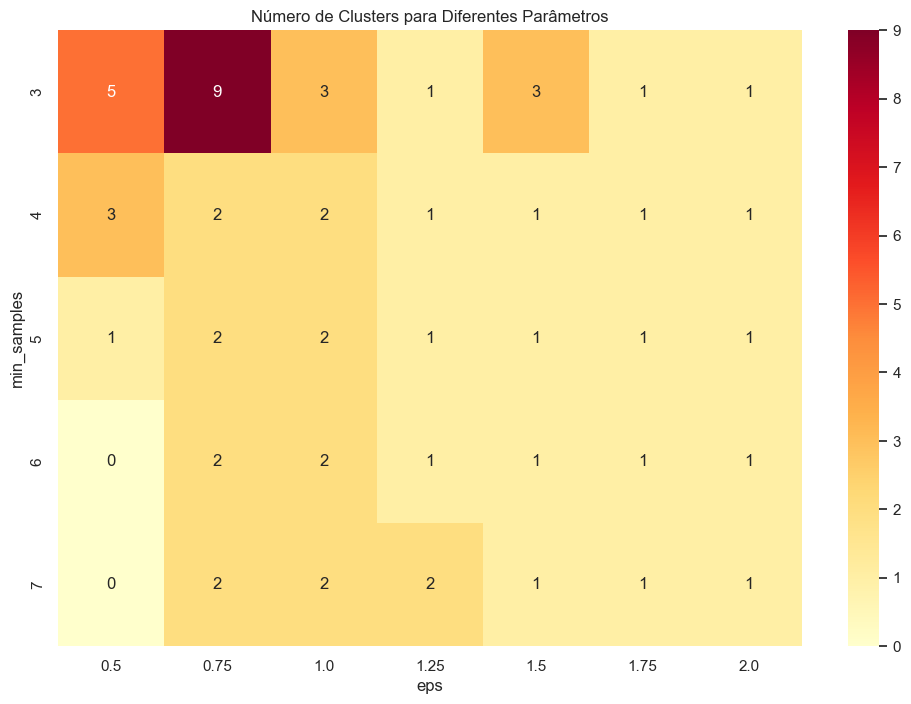


Melhores parâmetros encontrados:
eps: 1.500
min_samples: 3

Resultados do DBSCAN:
Número de clusters encontrados: 3
Número de pontos de ruído: 6
Porcentagem de ruído: 3.59%


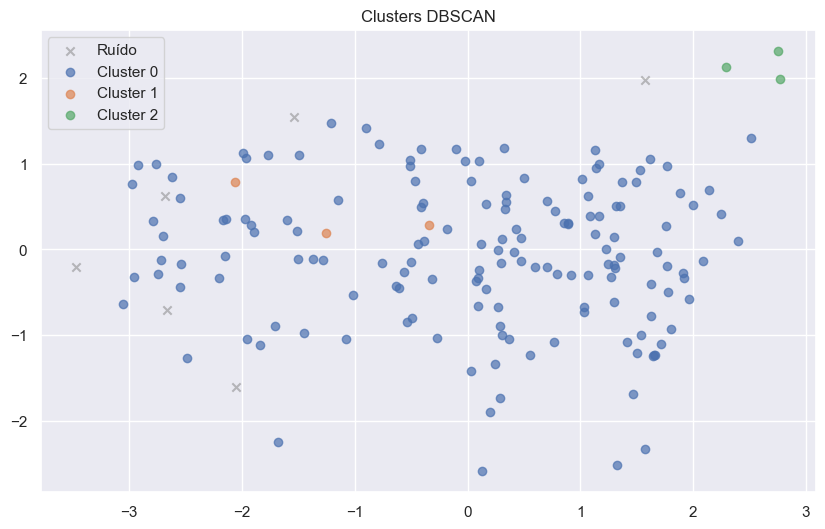


Análise dos clusters:

Cluster 0:
Número de países: 155
Países representativos:
Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda

Médias das variáveis:
child_mort    0.30
exports      -0.02
health        0.10
imports      -0.11
income       -0.03
inflation     0.04
life_expec   -0.17
total_fer     0.23
gdpp          0.03
dtype: float64

Cluster 1:
Número de países: 3
Países representativos:
Kiribati, Liberia, Micronesia, Fed. Sts.

Médias das variáveis:
child_mort    0.83
exports      -0.84
health        1.65
imports       1.01
income       -0.96
inflation    -0.24
life_expec   -0.94
total_fer     0.81
gdpp         -0.61
dtype: float64

Cluster 2:
Número de países: 3
Países representativos:
Luxembourg, Malta, Singapore

Médias das variáveis:
child_mort   -0.28
exports       1.98
health        0.13
imports       1.90
income        0.91
inflation    -0.42
life_expec    0.72
total_fer    -0.49
gdpp          0.98
dtype: float64


In [193]:
# CÉLULA 10: Análise Detalhada do DBSCAN

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

def test_dbscan_parameters(data, eps_range, min_samples_range):
    """
    Testa diferentes combinações de parâmetros para DBSCAN
    """
    results = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            # Garantir que min_samples seja inteiro
            min_samples = int(min_samples)
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': n_noise / len(data)
            })
    
    results_df = pd.DataFrame(results)
    
    # Visualizar resultados
    plt.figure(figsize=(12, 8))
    pivot_clusters = results_df.pivot(
        index='min_samples', 
        columns='eps', 
        values='n_clusters'
    )
    sns.heatmap(pivot_clusters, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Número de Clusters para Diferentes Parâmetros')
    plt.show()
    
    return results_df

# Definir ranges para teste
eps_range = np.linspace(0.5, 2.0, 7)
min_samples_range = np.arange(3, 8)  # Usando np.arange para garantir inteiros

# Testar diferentes parâmetros
print("Testando diferentes combinações de parâmetros...")
results_df = test_dbscan_parameters(data_preprocessed, eps_range, min_samples_range)

# Encontrar melhores parâmetros
good_results = results_df[
    (results_df['n_clusters'] >= 2) & 
    (results_df['noise_ratio'] < 0.2)
]

if len(good_results) > 0:
    best_params = good_results.iloc[0]
    print("\nMelhores parâmetros encontrados:")
    print(f"eps: {best_params['eps']:.3f}")
    print(f"min_samples: {int(best_params['min_samples'])}")
    
    # Aplicar DBSCAN com os melhores parâmetros
    dbscan = DBSCAN(
        eps=best_params['eps'], 
        min_samples=int(best_params['min_samples'])
    )
else:
    print("\nNenhuma combinação ótima encontrada, usando parâmetros padrão")
    dbscan = DBSCAN(eps=0.75, min_samples=5)

# Aplicar DBSCAN
labels = dbscan.fit_predict(data_preprocessed)

# Análise dos resultados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("\nResultados do DBSCAN:")
print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de pontos de ruído: {n_noise}")
print(f"Porcentagem de ruído: {(n_noise/len(labels))*100:.2f}%")

# Visualização dos clusters
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_preprocessed)

plt.figure(figsize=(10, 6))
# Plotar pontos de ruído
noise_mask = labels == -1
plt.scatter(data_2d[noise_mask, 0], data_2d[noise_mask, 1], 
           c='gray', marker='x', label='Ruído', alpha=0.5)

# Plotar clusters
for cluster in range(n_clusters):
    mask = labels == cluster
    plt.scatter(data_2d[mask, 0], data_2d[mask, 1], 
               label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clusters DBSCAN')
plt.legend()
plt.grid(True)
plt.show()

# Análise dos clusters
print("\nAnálise dos clusters:")
print("="*50)
for cluster in range(n_clusters):
    mask = labels == cluster
    cluster_countries = df.loc[mask, 'country'].values
    
    print(f"\nCluster {cluster}:")
    print(f"Número de países: {sum(mask)}")
    print("Países representativos:")
    print(", ".join(cluster_countries[:5]))
    
    print("\nMédias das variáveis:")
    cluster_means = data_preprocessed[mask].mean()
    print(cluster_means.round(2))

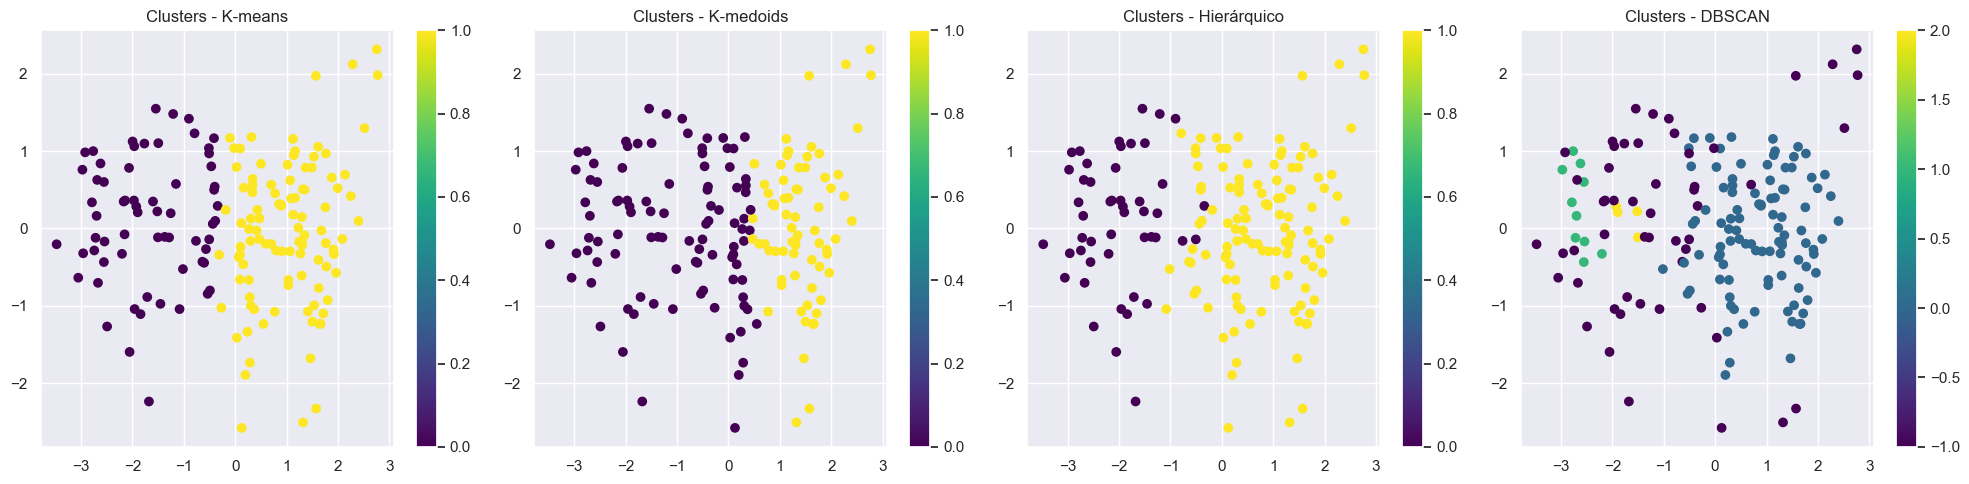


Comparação de Métricas:
        Método  Silhouette Score  Calinski-Harabasz Score
0      K-means             0.337                  101.568
1    K-medoids             0.269                   82.392
2  Hierárquico             0.359                   96.862


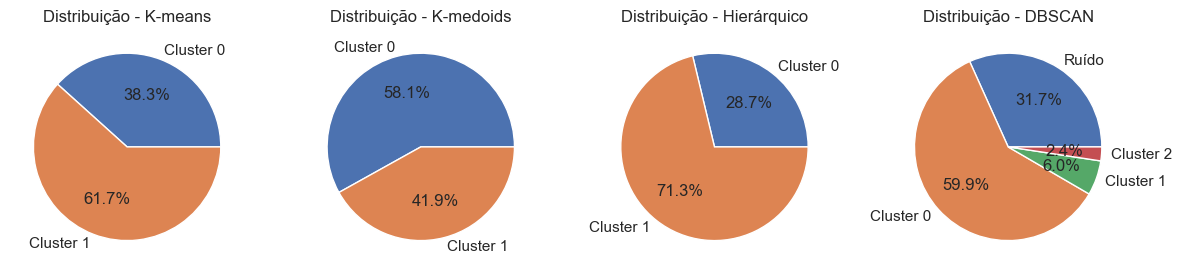


Análise Detalhada - K-means

Cluster 0:
Número de países: 64
Países representativos:
Afghanistan, Angola, Bangladesh, Benin, Bolivia

Estatísticas do cluster:
      child_mort  exports  health  imports   income  inflation  life_expec  \
mean       78.64    29.23    6.14    43.04  4055.83      11.56       61.46   
std        37.82    17.61    2.69    19.35  4972.68      13.97        6.84   

      total_fer     gdpp  
mean       4.48  1890.06  
std        1.28  2575.15  

Desvio da média global (%):
child_mort    105.49
exports       -28.90
health         -9.91
imports        -8.21
income        -76.34
inflation      48.55
life_expec    -12.89
total_fer      51.97
gdpp          -85.42
dtype: float64

Cluster 1:
Número de países: 103
Países representativos:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

Estatísticas do cluster:
      child_mort  exports  health  imports    income  inflation  life_expec  \
mean       13.18    48.49    7.24    49.28  25277.57       5.43       

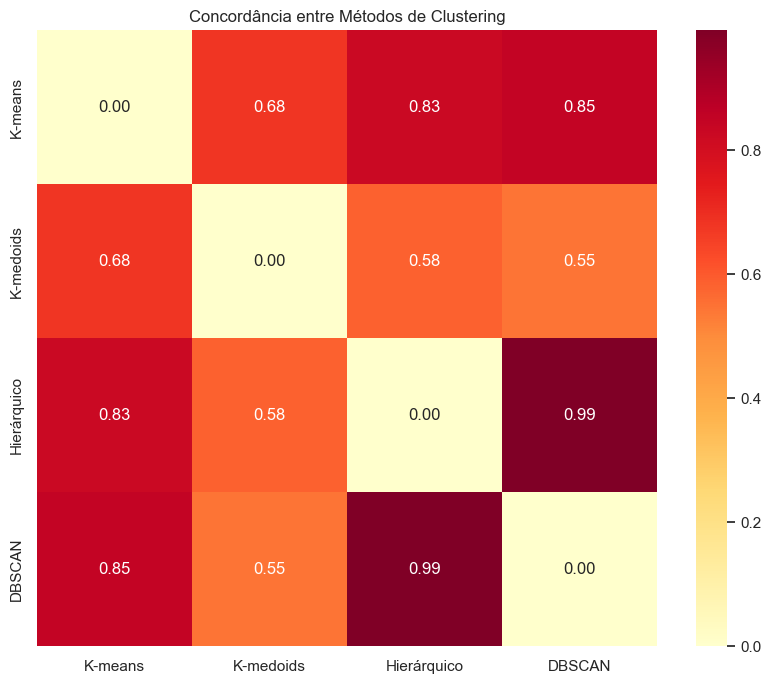

In [194]:
# CÉLULA 11: Comparação Completa dos Métodos de Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def compare_clustering_methods(data, kmeans_labels, kmedoids_labels, 
                            hierarchical_labels, dbscan_labels, original_df):
    """
    Realiza uma comparação completa entre os diferentes métodos de clustering
    """
    # Criar dicionário com os resultados
    clustering_results = {
        'K-means': kmeans_labels,
        'K-medoids': kmedoids_labels,
        'Hierárquico': hierarchical_labels,
        'DBSCAN': dbscan_labels
    }
    
    # 1. Visualização comparativa usando PCA
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    plt.figure(figsize=(20, 5))
    for i, (method, labels) in enumerate(clustering_results.items(), 1):
        plt.subplot(1, 4, i)
        scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
        plt.title(f'Clusters - {method}')
        plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

    # 2. Comparação de métricas
    metrics = []
    for method, labels in clustering_results.items():
        if -1 not in labels:  # Excluir DBSCAN noise points para métricas
            metrics.append({
                'Método': method,
                'Silhouette Score': silhouette_score(data, labels),
                'Calinski-Harabasz Score': calinski_harabasz_score(data, labels)
            })
    
    metrics_df = pd.DataFrame(metrics)
    print("\nComparação de Métricas:")
    print(metrics_df.round(3))

    # 3. Análise da distribuição dos clusters
    plt.figure(figsize=(12, 5))
    for i, (method, labels) in enumerate(clustering_results.items(), 1):
        plt.subplot(1, 4, i)
        unique_labels = np.unique(labels)
        sizes = [sum(labels == label) for label in unique_labels]
        plt.pie(sizes, labels=[f'Cluster {l}' if l != -1 else 'Ruído' for l in unique_labels],
                autopct='%1.1f%%')
        plt.title(f'Distribuição - {method}')
    plt.tight_layout()
    plt.show()

    # 4. Análise detalhada dos clusters por método
    numerical_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 
                     'inflation', 'life_expec', 'total_fer', 'gdpp']
    
    for method, labels in clustering_results.items():
        print(f"\nAnálise Detalhada - {method}")
        print("="*50)
        
        unique_labels = np.unique(labels)
        for label in unique_labels:
            if label != -1:  # Ignorar ruído do DBSCAN na análise
                mask = labels == label
                cluster_data = original_df[mask]
                
                print(f"\nCluster {label}:")
                print(f"Número de países: {sum(mask)}")
                print("Países representativos:")
                print(", ".join(cluster_data['country'].head().tolist()))
                
                # Características do cluster
                cluster_stats = cluster_data[numerical_cols].agg(['mean', 'std']).round(2)
                print("\nEstatísticas do cluster:")
                print(cluster_stats)
                
                # Comparação com média global
                global_means = original_df[numerical_cols].mean()
                diff_from_mean = ((cluster_stats.loc['mean'] - global_means) / global_means * 100).round(2)
                print("\nDesvio da média global (%):")
                print(diff_from_mean)
    
    # 5. Análise de estabilidade entre métodos
    print("\nAnálise de Concordância entre Métodos:")
    print("="*50)
    
    methods = list(clustering_results.keys())
    concordance_matrix = np.zeros((len(methods), len(methods)))
    
    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if i < j:  # Evitar redundância
                labels1 = clustering_results[method1]
                labels2 = clustering_results[method2]
                
                # Calcular concordância (excluindo ruído)
                mask = (labels1 != -1) & (labels2 != -1)
                if np.any(mask):
                    pairs_same_cluster = 0
                    total_pairs = 0
                    
                    for idx1 in range(len(labels1)):
                        for idx2 in range(idx1 + 1, len(labels2)):
                            if mask[idx1] and mask[idx2]:
                                same_cluster1 = labels1[idx1] == labels1[idx2]
                                same_cluster2 = labels2[idx1] == labels2[idx2]
                                if same_cluster1 == same_cluster2:
                                    pairs_same_cluster += 1
                                total_pairs += 1
                    
                    concordance = pairs_same_cluster / total_pairs if total_pairs > 0 else 0
                    concordance_matrix[i, j] = concordance
                    concordance_matrix[j, i] = concordance
    
    # Visualizar matriz de concordância
    plt.figure(figsize=(10, 8))
    sns.heatmap(concordance_matrix, annot=True, fmt='.2f', 
                xticklabels=methods, yticklabels=methods,
                cmap='YlOrRd')
    plt.title('Concordância entre Métodos de Clustering')
    plt.show()

# Aplicar a comparação
compare_clustering_methods(
    data_preprocessed,
    kmeans_results['labels'],
    kmedoids_results['labels'],
    hierarchical_results['labels'],
    dbscan_results['labels'],
    df
)

ANÁLISE FINAL DOS MÉTODOS DE CLUSTERING

K-means:
------------------------------
Número de clusters: 2

Distribuição dos clusters:
Cluster 0: 64 países (38.3%)
Cluster 1: 103 países (61.7%)

Características principais dos clusters:

Cluster 0:
- child_mort: 105.5% acima da média global
- gdpp: 85.4% abaixo da média global
- income: 76.3% abaixo da média global

Cluster 1:
- child_mort: 65.5% abaixo da média global
- gdpp: 53.1% acima da média global
- income: 47.4% acima da média global

K-medoids:
------------------------------
Número de clusters: 2

Distribuição dos clusters:
Cluster 0: 97 países (58.1%)
Cluster 1: 70 países (41.9%)

Características principais dos clusters:

Cluster 0:
- gdpp: 76.9% abaixo da média global
- income: 63.8% abaixo da média global
- child_mort: 56.7% acima da média global

Cluster 1:
- gdpp: 106.5% acima da média global
- income: 88.4% acima da média global
- child_mort: 78.6% abaixo da média global

Hierárquico:
------------------------------
Número de 

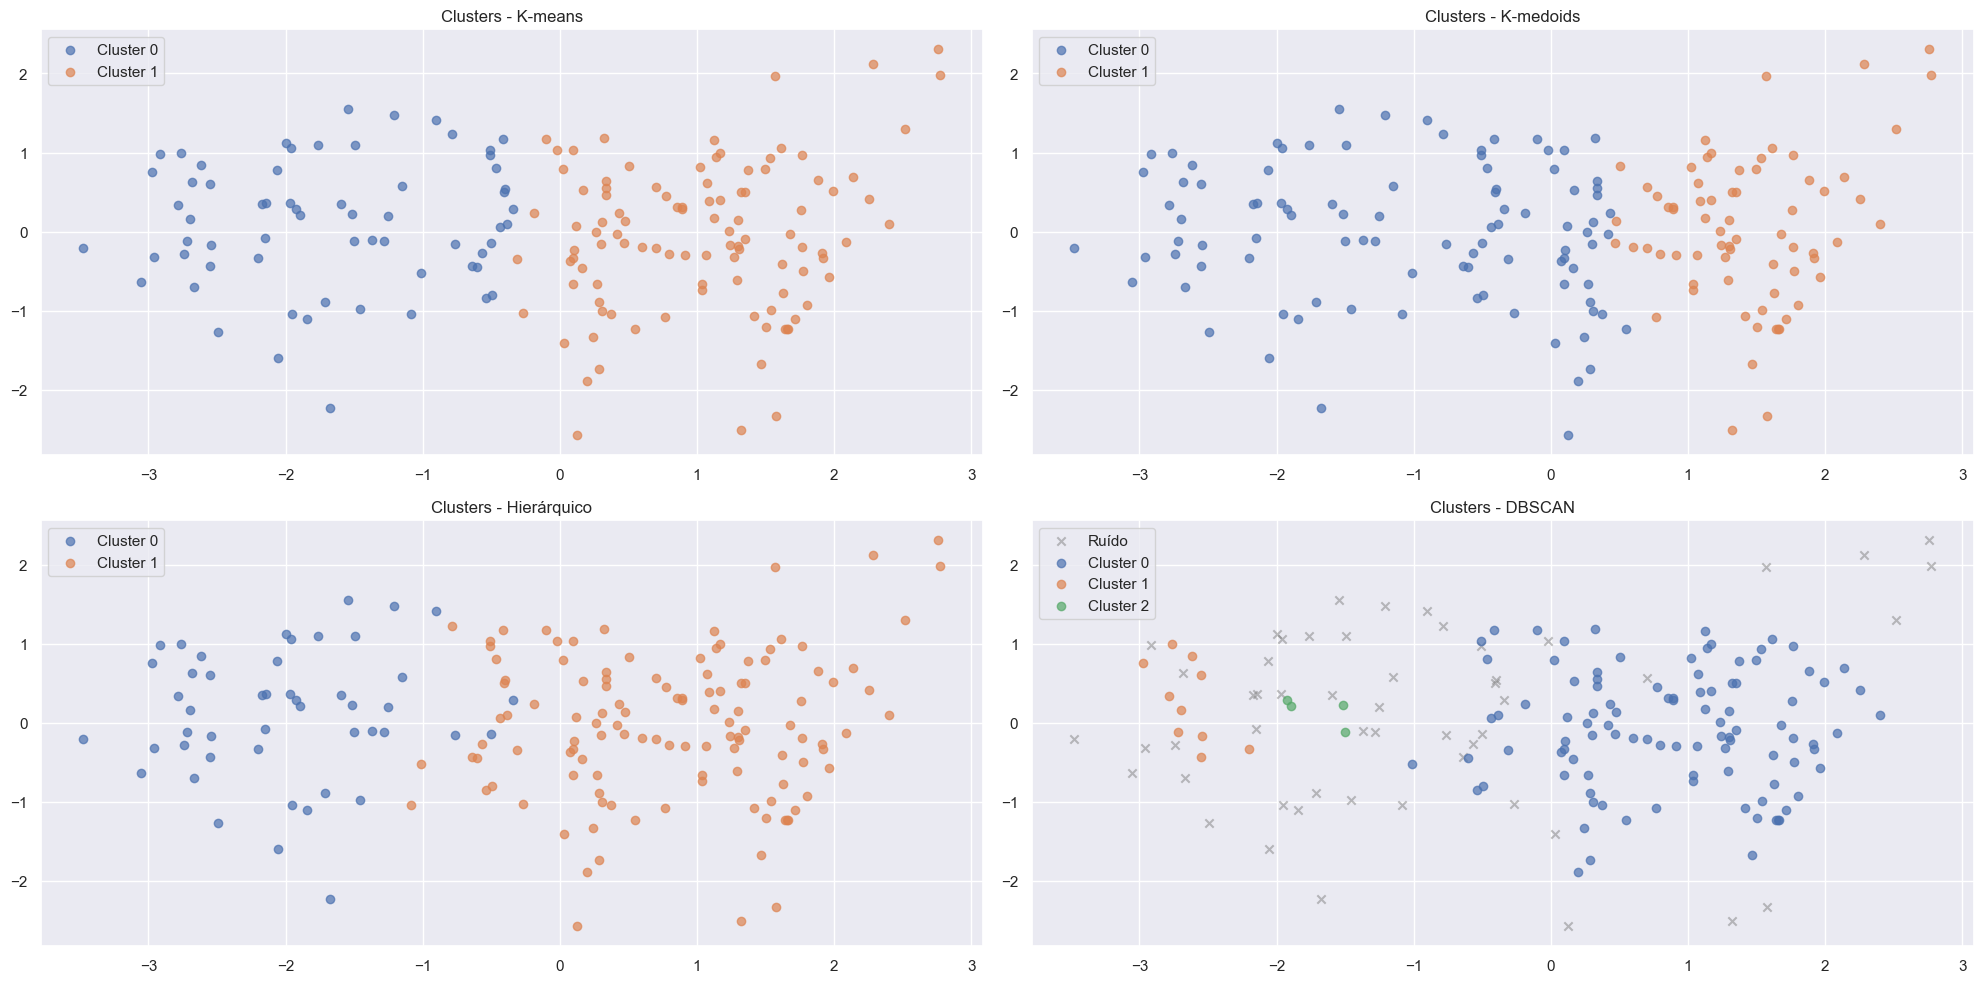


CONCLUSÕES E RECOMENDAÇÕES

1. Comparação dos Métodos:

    K-means:
    - Clusters mais equilibrados em tamanho
    - Boa separação geral dos grupos
    - Sensível a outliers
    
    K-medoids:
    - Mais robusto a outliers que K-means
    - Clusters representados por países reais
    - Pode ser mais lento que K-means
    
    Hierárquico:
    - Fornece visão da hierarquia dos grupos
    - Permite análise em diferentes níveis
    - Pode ser sensível a ruído
    
    DBSCAN:
    - Identifica outliers automaticamente
    - Não assume forma específica dos clusters
    - Pode ser sensível aos parâmetros
    

2. Recomendações de Uso:

    - Para análise exploratória inicial: K-means
    - Para identificação de outliers: DBSCAN
    - Para análise hierárquica: Clustering Hierárquico
    - Para interpretabilidade: K-medoids
    

3. Características Principais dos Países:

Variáveis mais importantes para a formação dos clusters:

K-means:
- life_expec: 0.808
- total_fer: 0.802
- child_mort:

In [195]:
# CÉLULA 12: Análise Final e Conclusões

def generate_final_analysis(df, kmeans_results, kmedoids_results, 
                          hierarchical_results, dbscan_results, numerical_columns):
    """
    Gera uma análise final comparativa e conclusões
    """
    # 1. Resumo das características dos clusters por método
    methods = {
        'K-means': kmeans_results['labels'],
        'K-medoids': kmedoids_results['labels'],
        'Hierárquico': hierarchical_results['labels'],
        'DBSCAN': dbscan_results['labels']
    }
    
    print("ANÁLISE FINAL DOS MÉTODOS DE CLUSTERING")
    print("="*50)
    
    # Análise por método
    for method_name, labels in methods.items():
        print(f"\n{method_name}:")
        print("-" * 30)
        
        # Número de clusters e distribuição
        n_clusters = len(set(labels[labels != -1]))
        cluster_sizes = pd.Series(labels[labels != -1]).value_counts()
        
        print(f"Número de clusters: {n_clusters}")
        print("\nDistribuição dos clusters:")
        for cluster in range(n_clusters):
            size = sum(labels == cluster)
            print(f"Cluster {cluster}: {size} países ({size/len(labels)*100:.1f}%)")
        
        if -1 in labels:
            n_noise = sum(labels == -1)
            print(f"Pontos de ruído: {n_noise} ({n_noise/len(labels)*100:.1f}%)")
        
        # Características principais de cada cluster
        print("\nCaracterísticas principais dos clusters:")
        for cluster in range(n_clusters):
            mask = labels == cluster
            cluster_data = df[mask]
            
            print(f"\nCluster {cluster}:")
            # Calcular características distintivas
            cluster_means = cluster_data[numerical_columns].mean()
            global_means = df[numerical_columns].mean()
            diff = ((cluster_means - global_means) / global_means * 100).round(2)
            
            # Identificar as 3 características mais distintivas
            top_features = diff.abs().nlargest(3)
            for feature in top_features.index:
                direction = "acima" if diff[feature] > 0 else "abaixo"
                print(f"- {feature}: {abs(diff[feature]):.1f}% {direction} da média global")
    
    # 2. Comparação visual final
    plt.figure(figsize=(20, 10))
    
    # PCA para visualização
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_preprocessed)
    
    for idx, (method_name, labels) in enumerate(methods.items(), 1):
        plt.subplot(2, 2, idx)
        unique_labels = np.unique(labels)
        
        for label in unique_labels:
            mask = labels == label
            if label == -1:
                plt.scatter(data_pca[mask, 0], data_pca[mask, 1], 
                          c='gray', marker='x', label='Ruído', alpha=0.5)
            else:
                plt.scatter(data_pca[mask, 0], data_pca[mask, 1], 
                          label=f'Cluster {label}', alpha=0.7)
        
        plt.title(f'Clusters - {method_name}')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    # 3. Conclusões e Recomendações
    print("\nCONCLUSÕES E RECOMENDAÇÕES")
    print("="*50)
    
    print("\n1. Comparação dos Métodos:")
    print("""
    K-means:
    - Clusters mais equilibrados em tamanho
    - Boa separação geral dos grupos
    - Sensível a outliers
    
    K-medoids:
    - Mais robusto a outliers que K-means
    - Clusters representados por países reais
    - Pode ser mais lento que K-means
    
    Hierárquico:
    - Fornece visão da hierarquia dos grupos
    - Permite análise em diferentes níveis
    - Pode ser sensível a ruído
    
    DBSCAN:
    - Identifica outliers automaticamente
    - Não assume forma específica dos clusters
    - Pode ser sensível aos parâmetros
    """)
    
    print("\n2. Recomendações de Uso:")
    print("""
    - Para análise exploratória inicial: K-means
    - Para identificação de outliers: DBSCAN
    - Para análise hierárquica: Clustering Hierárquico
    - Para interpretabilidade: K-medoids
    """)
    
    print("\n3. Características Principais dos Países:")
    # Calcular correlações entre variáveis e clusters
    cluster_correlations = {}
    for method_name, labels in methods.items():
        if -1 not in labels:  # Excluir DBSCAN com ruído
            correlations = []
            for col in numerical_columns:
                correlation = np.corrcoef(labels, df[col])[0,1]
                correlations.append((col, abs(correlation)))
            
            # Ordenar por correlação absoluta
            correlations.sort(key=lambda x: x[1], reverse=True)
            cluster_correlations[method_name] = correlations
    
    print("\nVariáveis mais importantes para a formação dos clusters:")
    for method, correlations in cluster_correlations.items():
        print(f"\n{method}:")
        for var, corr in correlations[:3]:
            print(f"- {var}: {corr:.3f}")

# Executar análise final
generate_final_analysis(df, kmeans_results, kmedoids_results, 
                       hierarchical_results, dbscan_results, numerical_columns)

Calculando métricas para diferentes números de clusters...
Avaliando k=2
Avaliando k=3
Avaliando k=4
Avaliando k=5
Avaliando k=6
Avaliando k=7


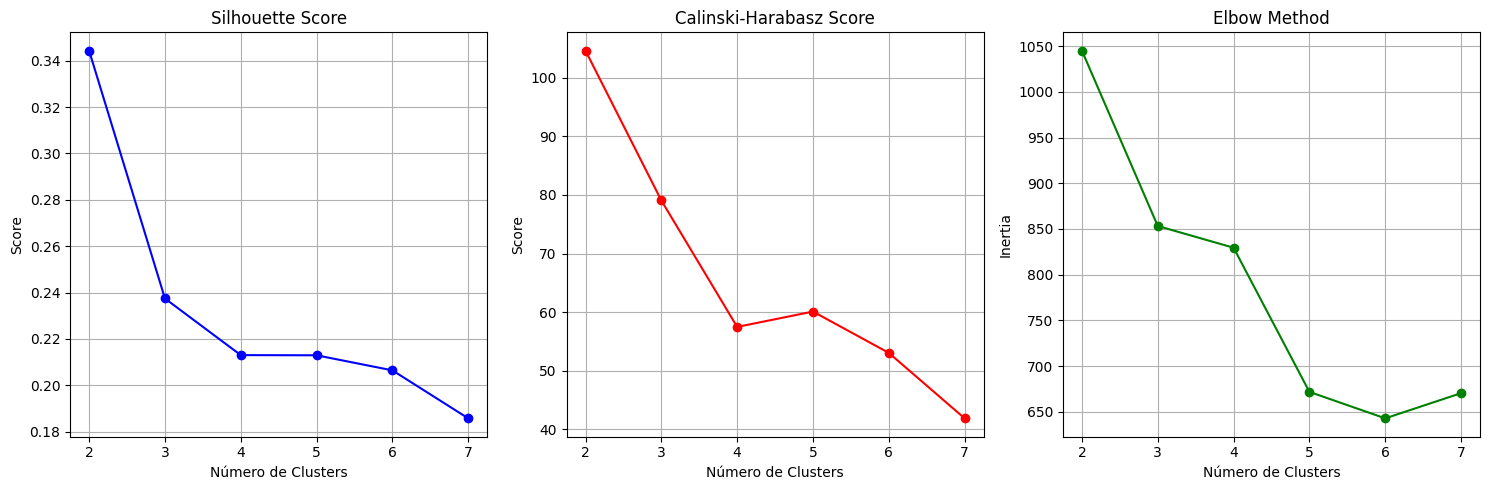


Análise do Número Ótimo de Clusters:
Melhor k segundo Silhouette Score: 2
Melhor k segundo Calinski-Harabasz Score: 2
Melhor k segundo método do Elbow: 5

Tabela completa de métricas:
   K  Silhouette Score  Calinski-Harabasz Score   Inertia
0  2             0.344                  104.648  1044.961
1  3             0.237                   79.063   853.267
2  4             0.213                   57.463   829.503
3  5             0.213                   60.086   671.838
4  6             0.206                   53.026   642.909
5  7             0.186                   41.844   670.434


In [147]:
# CÉLULA 7 (NOVA) - Análise do Número Ótimo de Clusters
def calculate_clustering_scores(data, k_range):
    """
    Calcula diferentes métricas para determinar o número ótimo de clusters
    """
    silhouette_scores = []
    calinski_scores = []
    inertias = []
    
    print("Calculando métricas para diferentes números de clusters...")
    
    for k in k_range:
        print(f"Avaliando k={k}")
        
        # Aplicar K-Medoids
        medoids, clusters = improved_k_medoids(data, k)
        
        # Criar array de labels
        labels = np.zeros(len(data))
        for cluster_idx, cluster_points in clusters.items():
            labels[cluster_points] = cluster_idx
            
        # Calcular métricas
        silhouette_scores.append(silhouette_score(data, labels))
        calinski_scores.append(calinski_harabasz_score(data, labels))
        
        # Calcular inércia
        inertia = 0
        for cluster_idx, cluster_points in clusters.items():
            cluster_data = data[cluster_points]
            medoid = data[medoids[cluster_idx]]
            inertia += np.sum(np.linalg.norm(cluster_data - medoid, axis=1)**2)
        inertias.append(inertia)
    
    return silhouette_scores, calinski_scores, inertias

# Definir range de k para testar
k_range = range(2, 8)

# Calcular métricas
silhouette_scores, calinski_scores, inertias = calculate_clustering_scores(data_scaled_df.values, k_range)

# Plotar resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(k_range, silhouette_scores, 'bo-')
axes[0].set_title('Silhouette Score')
axes[0].set_xlabel('Número de Clusters')
axes[0].set_ylabel('Score')
axes[0].grid(True)

axes[1].plot(k_range, calinski_scores, 'ro-')
axes[1].set_title('Calinski-Harabasz Score')
axes[1].set_xlabel('Número de Clusters')
axes[1].set_ylabel('Score')
axes[1].grid(True)

axes[2].plot(k_range, inertias, 'go-')
axes[2].set_title('Elbow Method')
axes[2].set_xlabel('Número de Clusters')
axes[2].set_ylabel('Inertia')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Encontrar o melhor k para cada métrica
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_calinski = k_range[np.argmax(calinski_scores)]

# Encontrar o ponto de cotovelo
def find_elbow(x, y):
    npoints = len(x)
    distances = []
    
    p1 = np.array([x[0], y[0]])
    p2 = np.array([x[-1], y[-1]])
    
    for i in range(npoints):
        point = np.array([x[i], y[i]])
        distances.append(np.abs(np.cross(p2-p1, point-p1)/np.linalg.norm(p2-p1)))
    
    return x[np.argmax(distances)]

best_k_elbow = find_elbow(list(k_range), inertias)

print("\nAnálise do Número Ótimo de Clusters:")
print("="*50)
print(f"Melhor k segundo Silhouette Score: {best_k_silhouette}")
print(f"Melhor k segundo Calinski-Harabasz Score: {best_k_calinski}")
print(f"Melhor k segundo método do Elbow: {best_k_elbow}")

# Criar tabela com todos os scores
results_df = pd.DataFrame({
    'K': list(k_range),
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Score': calinski_scores,
    'Inertia': inertias
})

print("\nTabela completa de métricas:")
print(results_df.round(3))


Centroides dos clusters:
   child_mort   exports    health    income  inflation   imports  life_expec  \
0   -0.176008 -0.011585 -0.395363 -0.057032   0.431395 -0.126748   -0.036672   
1   -0.803720  0.547006  0.533674  0.959767  -0.746405  0.240146    0.918846   
2    1.527282 -0.807026 -0.107866 -1.351052   0.365940 -0.139052   -1.325168   

   total_fer      gdpp  
0  -0.169062 -0.170531  
1  -0.794353  1.024393  
2   1.500823 -1.248014  

Tamanho dos clusters:
cluster
0    69
1    59
2    39
Name: count, dtype: int64

Cluster 0:
Países neste cluster:
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil' 'Cambodia'
 'Cape Verde' 'China' 'Colombia' 'Congo, Rep.' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Fiji' 'Gabon'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Lao' 'Libya'
 'Micronesia, Fed. Sts

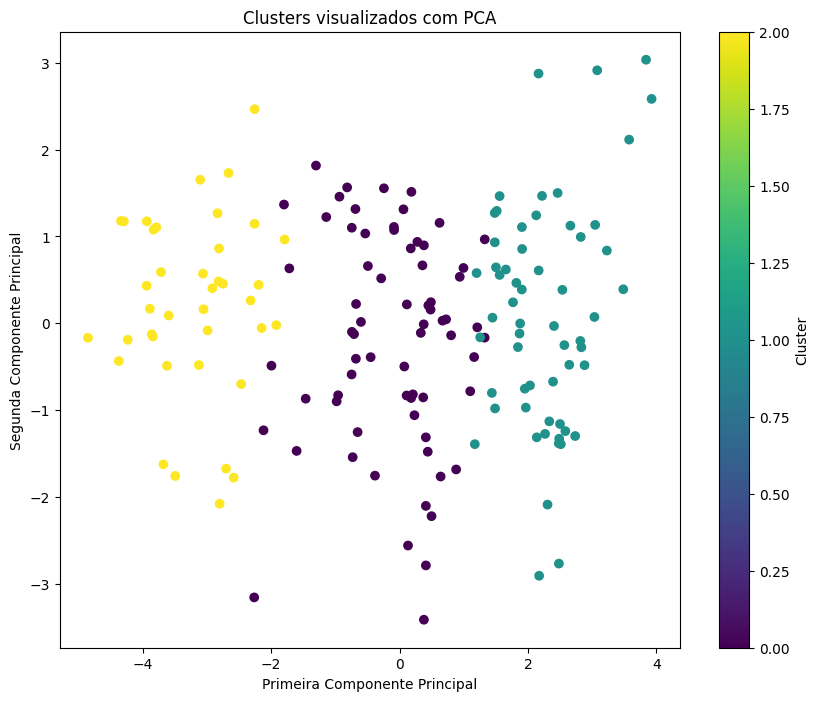


Inércia do modelo: 748.6104180495216
Silhouette Score: 0.2450562885305628

Países mais representativos de cada cluster:
Cluster 0: Jamaica
Cluster 1: South Korea
Cluster 2: Tanzania


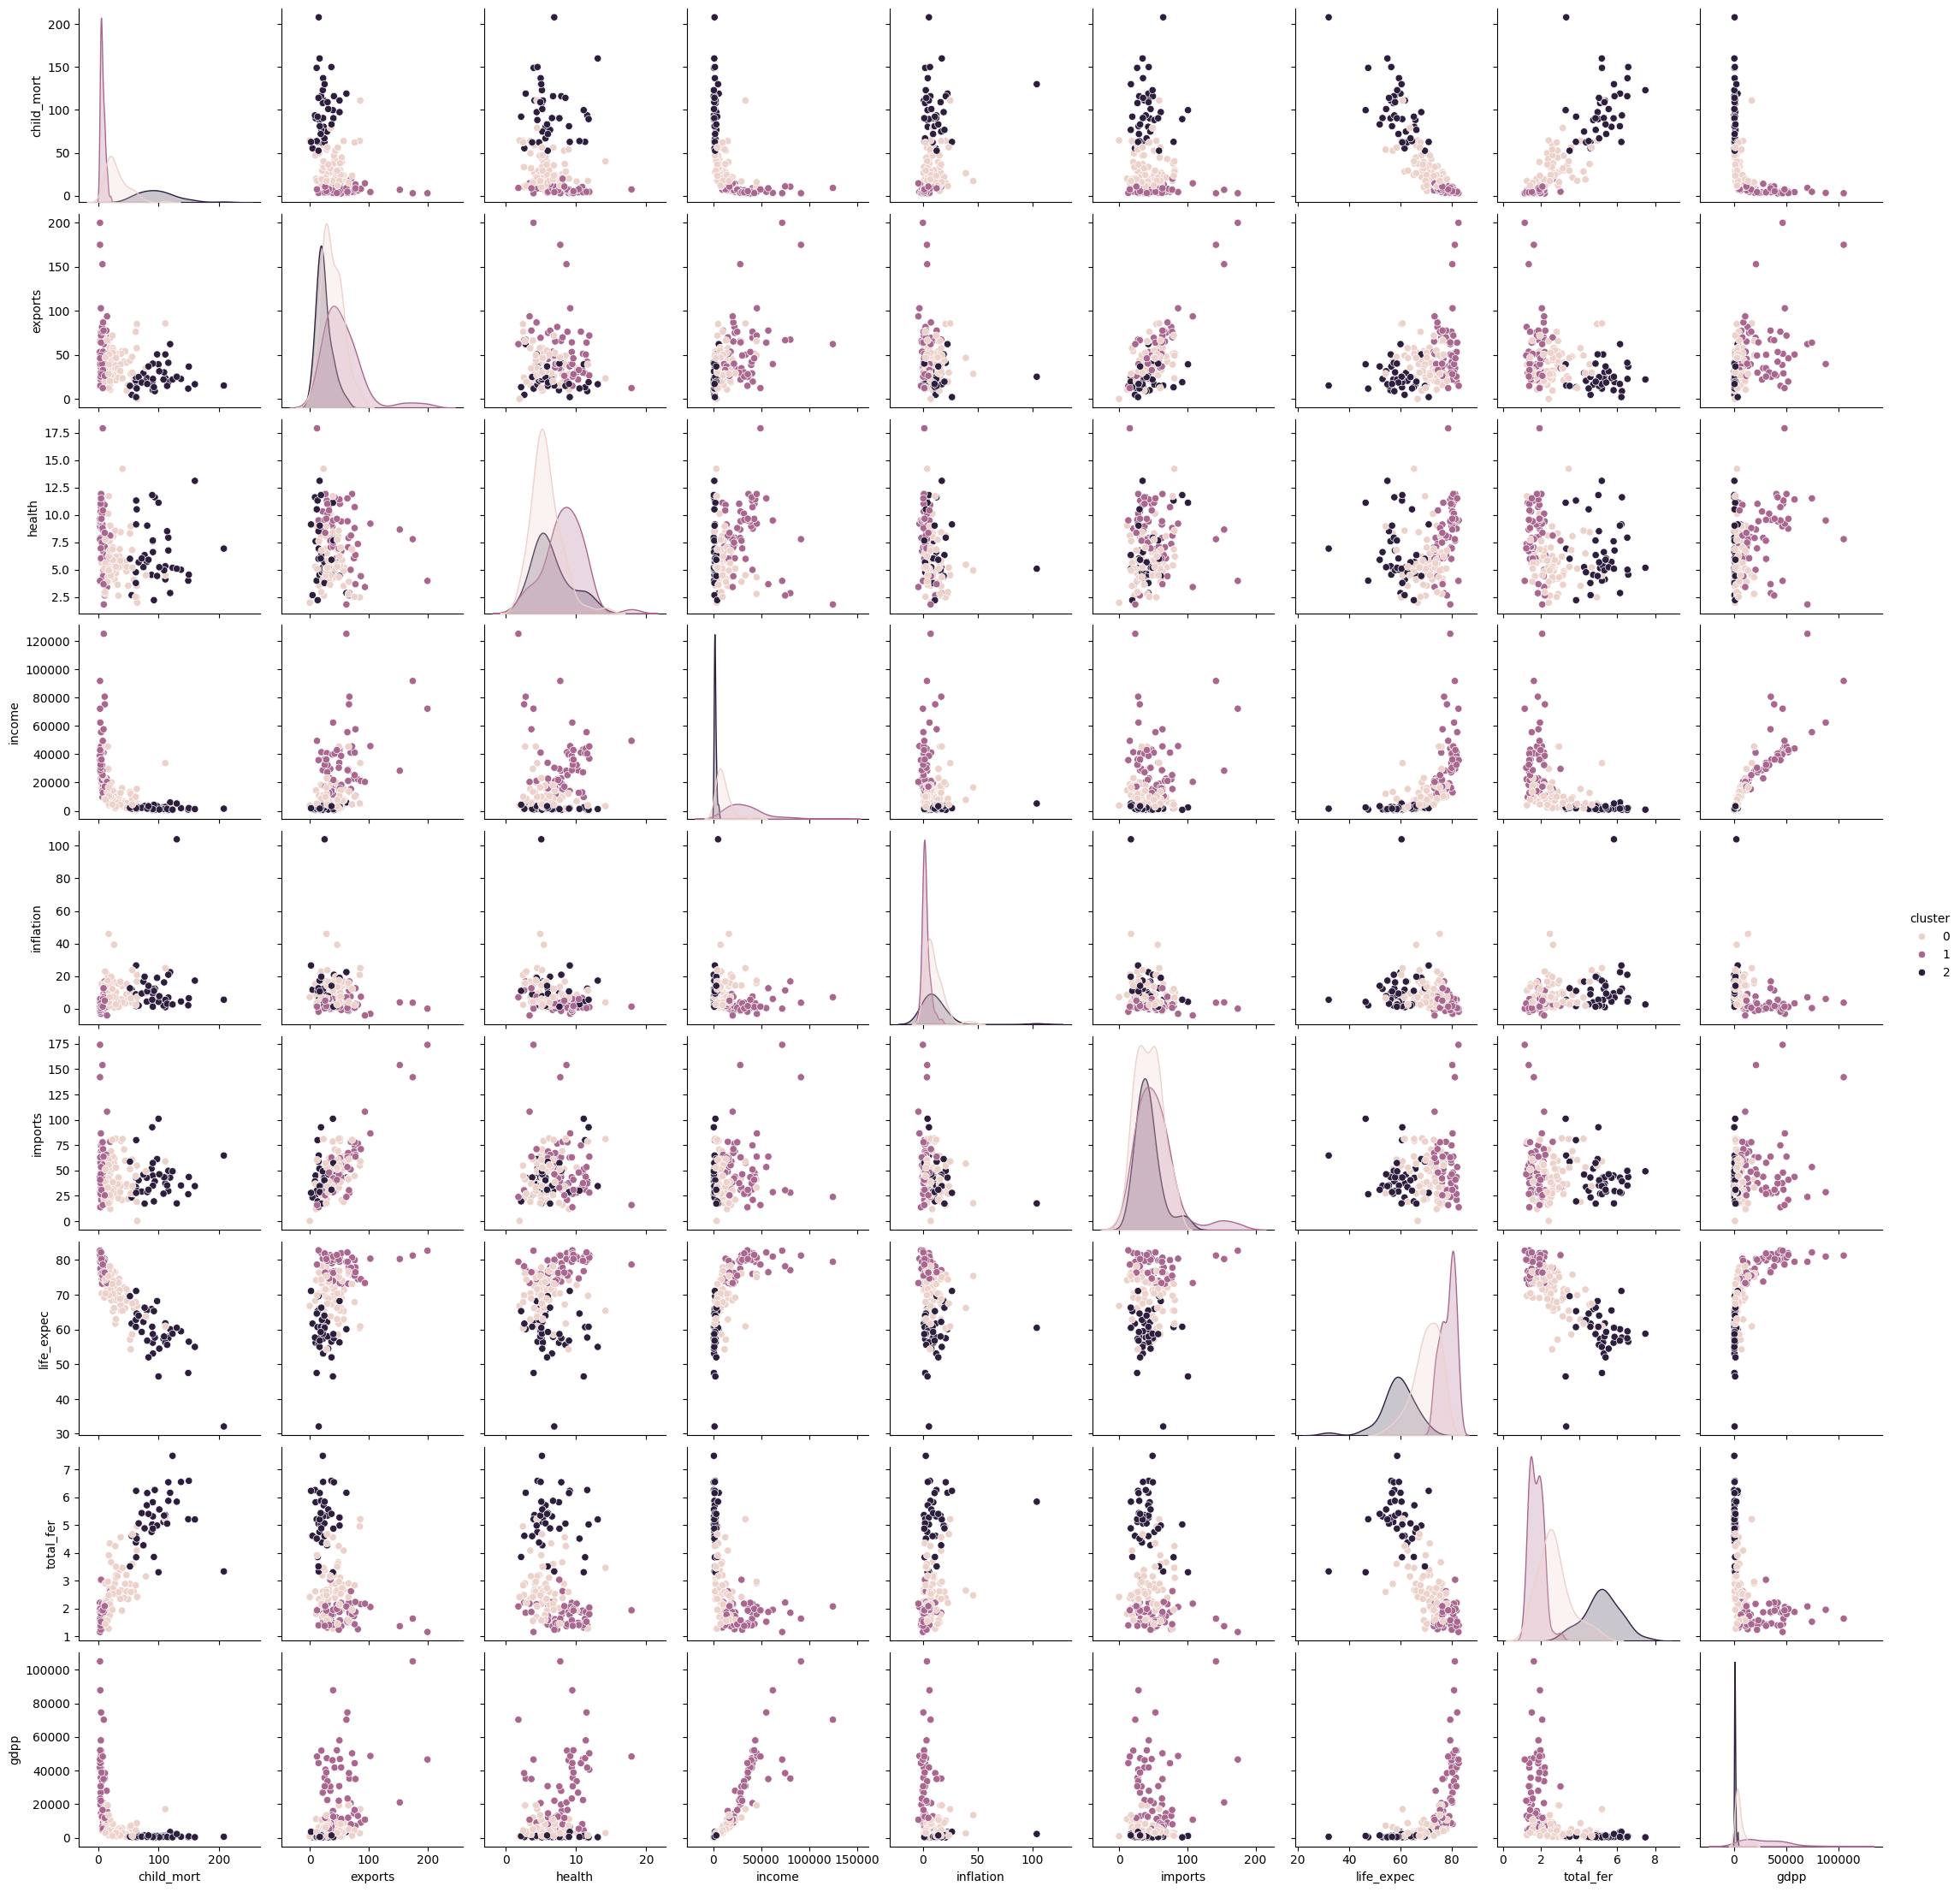

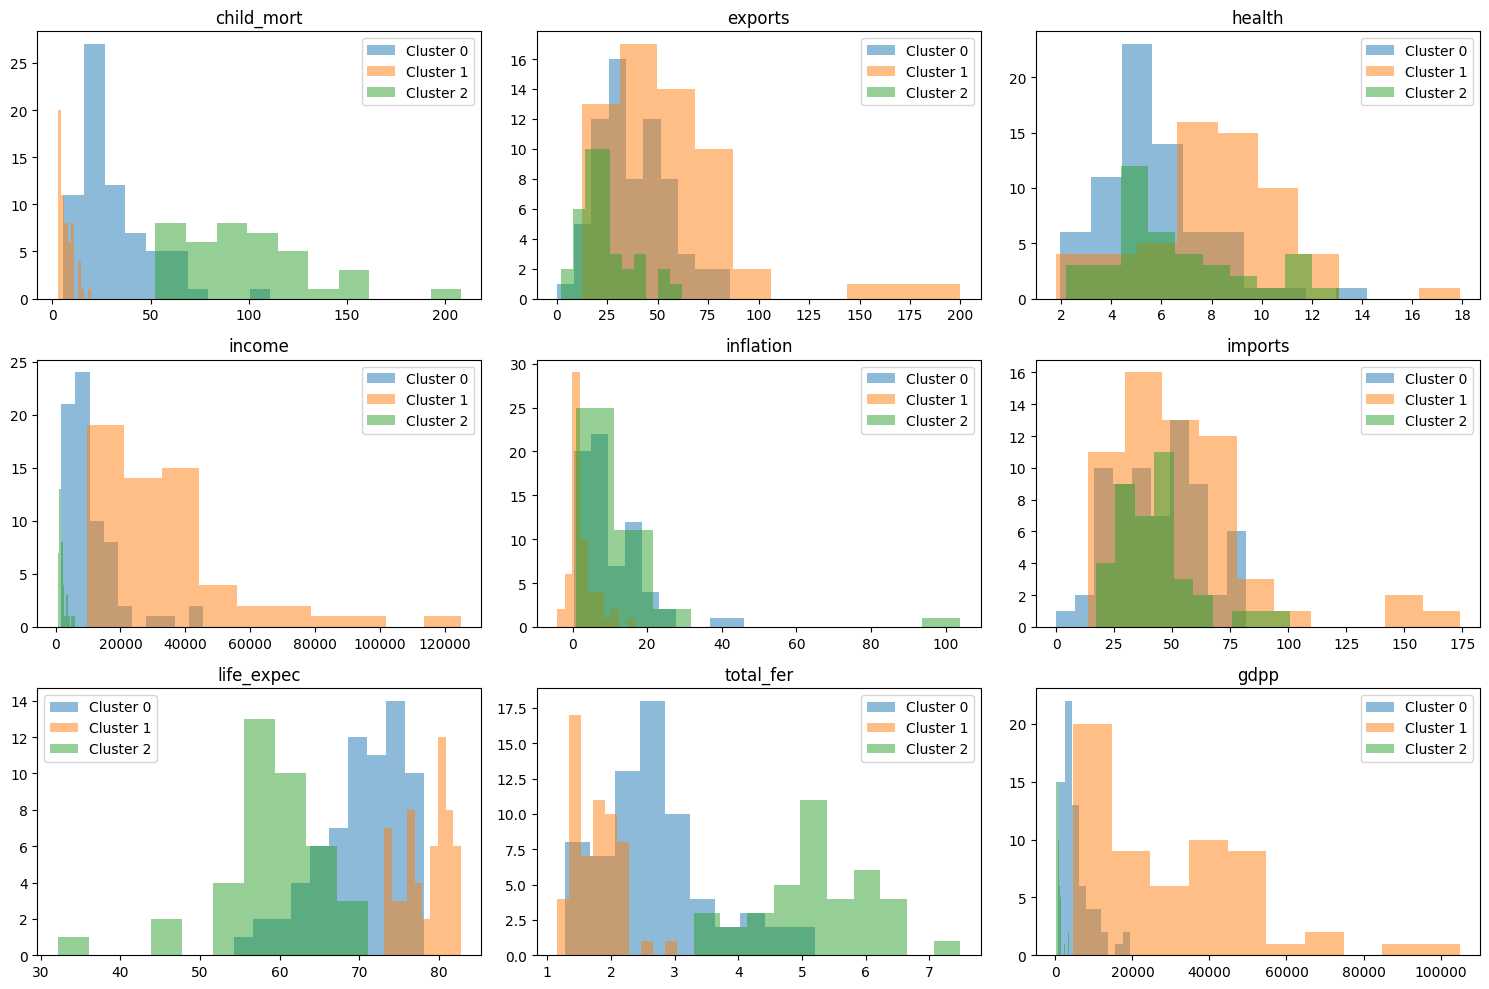

In [158]:
# Definir o modelo e treinar
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled_df)

# Adicionar os rótulos ao DataFrame original
df['cluster'] = kmeans.labels_

# Análise dos centroides
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns)
print("\nCentroides dos clusters:")
print(centroids)

# Tamanho dos clusters
print("\nTamanho dos clusters:")
print(df['cluster'].value_counts())

# Análise detalhada de cada cluster
for cluster in range(3):
    print(f"\nCluster {cluster}:")
    print("Países neste cluster:")
    print(df[df['cluster'] == cluster]['country'].values)
    print("\nMédia das variáveis no cluster:")
    print(df[df['cluster'] == cluster][numerical_columns].mean())

# Visualização dos clusters usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters visualizados com PCA')
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(label='Cluster')
plt.show()

# Avaliação da qualidade do clustering
print("\nInércia do modelo:", kmeans.inertia_)
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Encontrar os países mais representativos de cada cluster
print("\nPaíses mais representativos de cada cluster:")
for i in range(3):
    cluster_points = data_scaled[kmeans.labels_ == i]
    distances = np.linalg.norm(cluster_points - kmeans.cluster_centers_[i], axis=1)
    closest_point_idx = np.argmin(distances)
    closest_country = df[kmeans.labels_ == i]['country'].iloc[closest_point_idx]
    print(f"Cluster {i}: {closest_country}")

# Criar e salvar o pairplot
try:
    pairplot = sns.pairplot(df, hue='cluster', vars=numerical_columns)
    plt.show()
    pairplot.savefig("pairplot.png", format='png', bbox_inches='tight')
except Exception as e:
    print(f"Erro ao criar ou salvar o pairplot: {e}")

# Análise da distribuição das variáveis em cada cluster
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    for cluster in range(3):
        cluster_data = df[df['cluster'] == cluster][column]
        plt.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(column)
    plt.legend()
plt.tight_layout()
plt.show()


Aplicando K-Medoids com k=3...


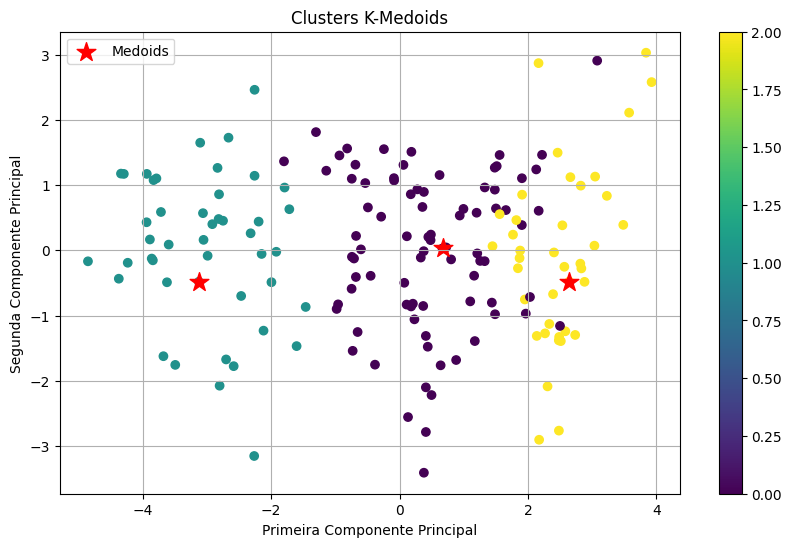


Resultados do K-Medoids:

Cluster 0:
Número de países: 83
Países representativos: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

Características médias (valores padronizados):
child_mort   -0.36
exports       0.29
health       -0.29
imports       0.07
income        0.21
inflation     0.27
life_expec    0.17
total_fer    -0.32
gdpp          0.10
dtype: float64

Cluster 1:
Número de países: 45
Países representativos: Afghanistan, Angola, Bangladesh, Benin, Burkina Faso

Características médias (valores padronizados):
child_mort    1.40
exports      -0.85
health       -0.23
imports      -0.24
income       -1.28
inflation     0.41
life_expec   -1.20
total_fer     1.30
gdpp         -1.23
dtype: float64

Cluster 2:
Número de países: 39
Países representativos: Australia, Austria, Bahamas, Barbados, Belgium

Características médias (valores padronizados):
child_mort   -0.84
exports       0.37
health        0.89
imports       0.13
income        1.04
inflation    -1.06
life_expec    1

In [149]:
# CÉLULA 6 - K-Medoids
def improved_k_medoids(data, k, max_iter=100):
    n_samples = len(data)
    medoid_indices = [np.random.randint(n_samples)]
    distances = pairwise_distances(data)
    
    for _ in range(k-1):
        min_distances = np.min([distances[i] for i in medoid_indices], axis=0)
        next_medoid = np.argmax(min_distances)
        medoid_indices.append(next_medoid)
    
    best_cost = float('inf')
    best_medoids = None
    best_clusters = None
    
    for attempt in range(3):
        current_medoids = medoid_indices.copy()
        
        for _ in range(max_iter):
            clusters = {i: [] for i in range(k)}
            for idx, point in enumerate(data):
                distances_to_medoids = [np.linalg.norm(point - data[m]) for m in current_medoids]
                closest_medoid_idx = np.argmin(distances_to_medoids)
                clusters[closest_medoid_idx].append(idx)
            
            old_medoids = current_medoids.copy()
            current_cost = 0
            
            for cluster_idx, cluster_points in clusters.items():
                if cluster_points:
                    cluster_distances = pairwise_distances(data[cluster_points])
                    within_cluster_costs = cluster_distances.sum(axis=1)
                    new_medoid_idx = cluster_points[np.argmin(within_cluster_costs)]
                    current_medoids[cluster_idx] = new_medoid_idx
                    current_cost += np.min(within_cluster_costs)
            
            if current_cost < best_cost:
                best_cost = current_cost
                best_medoids = current_medoids.copy()
                best_clusters = clusters.copy()
                
            if set(old_medoids) == set(current_medoids):
                break
    
    return best_medoids, best_clusters

# Aplicar K-Medoids
k = 3
print(f"\nAplicando K-Medoids com k={k}...")
medoids, clusters = improved_k_medoids(data_scaled_df.values, k)
k_labels = np.zeros(len(df))
for cluster_idx, cluster_points in clusters.items():
    k_labels[cluster_points] = cluster_idx

# Adicionar visualização dos clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=k_labels, cmap='viridis')
plt.scatter(data_pca[medoids, 0], data_pca[medoids, 1], 
           c='red', marker='*', s=200, label='Medoids')
plt.title('Clusters K-Medoids')
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(scatter)
plt.legend()
plt.grid(True)
plt.show()

# Análise dos clusters
print("\nResultados do K-Medoids:")
print("="*50)
for cluster_idx in range(k):
    cluster_points = clusters[cluster_idx]
    print(f"\nCluster {cluster_idx}:")
    print(f"Número de países: {len(cluster_points)}")
    print("Países representativos:", ", ".join(df['country'].iloc[cluster_points][:5]))
    
    # Calcular médias das características do cluster
    cluster_data = data_scaled_df.iloc[cluster_points]
    print("\nCaracterísticas médias (valores padronizados):")
    print(cluster_data.mean().round(2))

# Métricas de avaliação
silhouette_avg = silhouette_score(data_scaled_df, k_labels)
calinski_score = calinski_harabasz_score(data_scaled_df, k_labels)

print("\nMétricas de Avaliação:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Score: {calinski_score:.3f}")


Calculando matriz de ligação para clusterização hierárquica...


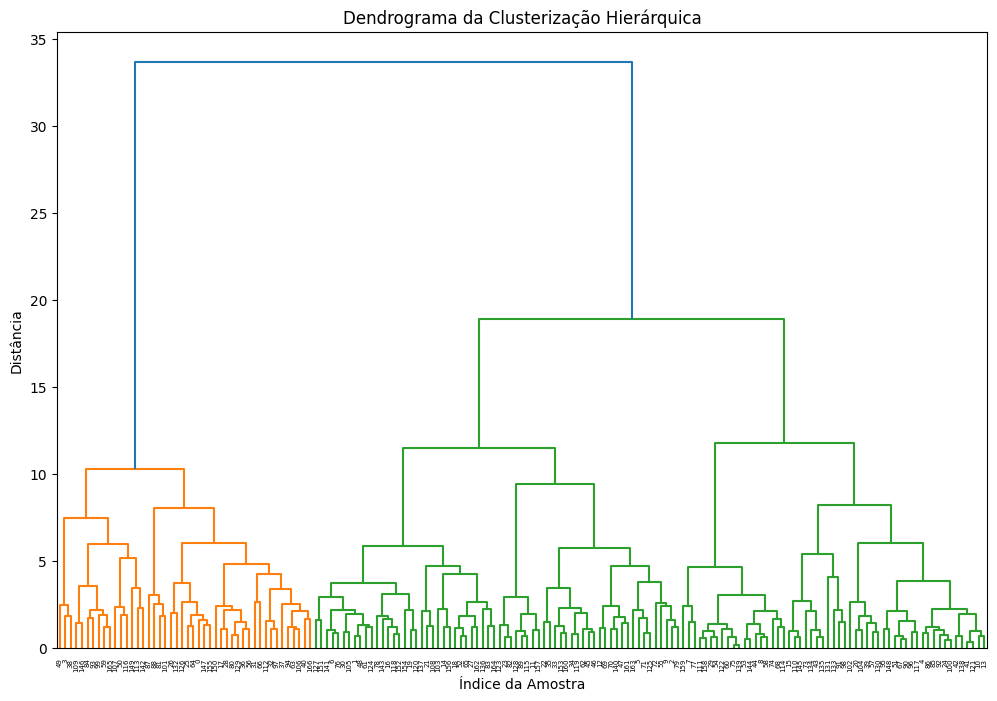


Resultados do DBSCAN:
Número de clusters encontrados: 4
Número de pontos de ruído: 146


In [142]:
# CÉLULA 7 - Clustering Hierárquico
# Calcular matriz de ligação
print("\nCalculando matriz de ligação para clusterização hierárquica...")
linkage_matrix = linkage(data_scaled_df, method='ward')

# Plotar dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
plt.show()

# Obter labels
h_labels = fcluster(linkage_matrix, 3, criterion='maxclust') - 1

# CÉLULA 8 - DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=4)
db_labels = dbscan.fit_predict(data_scaled_df)

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print("\nResultados do DBSCAN:")
print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de pontos de ruído: {n_noise}")

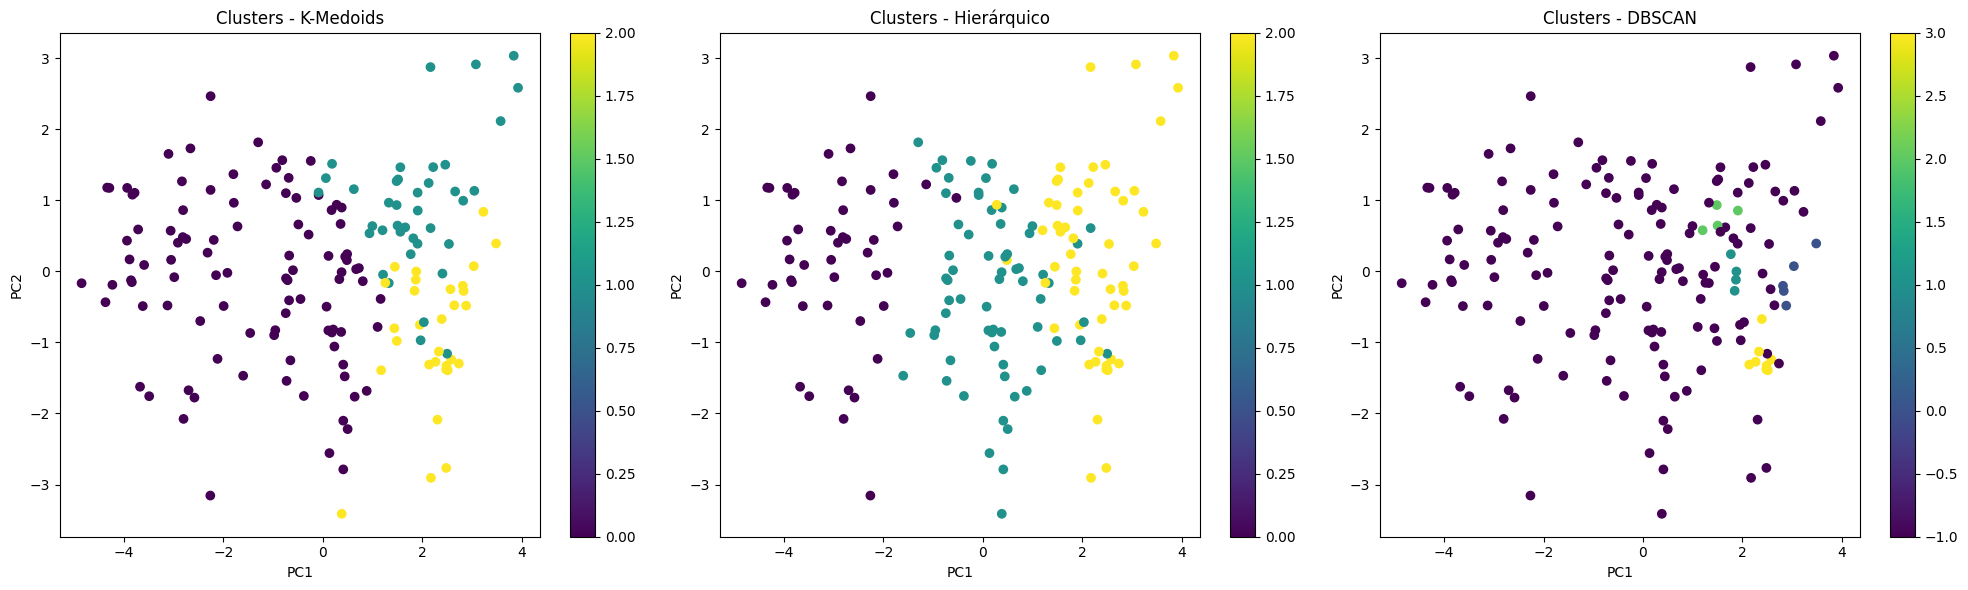


Métricas de Qualidade dos Clusters:

K-Medoids:
Silhouette Score: 0.192
Calinski-Harabasz Score: 54.074

Hierárquico:
Silhouette Score: 0.237
Calinski-Harabasz Score: 80.964


In [143]:
# CÉLULA 9 - Comparação dos Métodos
methods = {
    'K-Medoids': k_labels,
    'Hierárquico': h_labels,
    'DBSCAN': db_labels
}

# Visualização comparativa
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (method, labels) in enumerate(methods.items()):
    scatter = axes[idx].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
    axes[idx].set_title(f'Clusters - {method}')
    axes[idx].set_xlabel('PC1')
    axes[idx].set_ylabel('PC2')
    plt.colorbar(scatter, ax=axes[idx])

plt.tight_layout()
plt.show()

# Métricas de qualidade
print("\nMétricas de Qualidade dos Clusters:")
print("="*50)
for method, labels in methods.items():
    if -1 not in labels:
        silhouette = silhouette_score(data_scaled_df, labels)
        calinski = calinski_harabasz_score(data_scaled_df, labels)
        
        print(f"\n{method}:")
        print(f"Silhouette Score: {silhouette:.3f}")
        print(f"Calinski-Harabasz Score: {calinski:.3f}")

In [144]:
# CÉLULA 10 - Análise Detalhada dos Clusters
def analyze_clusters(df, labels, medoids=None, method_name=""):
    """
    Análise detalhada dos clusters
    """
    numerical_columns = ['child_mort', 'exports', 'health', 'imports', 'income', 
                        'inflation', 'life_expec', 'total_fer', 'gdpp']
    
    df_with_labels = df.copy()
    df_with_labels['cluster'] = labels
    
    print(f"\nAnálise dos Clusters - Método: {method_name}")
    print("="*50)
    
    cluster_summary = pd.DataFrame()
    unique_clusters = np.unique(labels)
    
    for cluster in unique_clusters:
        if cluster != -1:  # Ignorar pontos de ruído do DBSCAN
            cluster_data = df_with_labels[df_with_labels['cluster'] == cluster]
            print(f"\nCluster {int(cluster)}:")
            print(f"Número de países: {len(cluster_data)}")
            print("\nPaíses representativos:")
            print(", ".join(cluster_data['country'].head().tolist()))
            
            # Características do cluster
            print("\nCaracterísticas médias:")
            for col in numerical_columns:
                mean_value = cluster_data[col].mean()
                global_mean = df[col].mean()
                diff_from_mean = ((mean_value - global_mean) / global_mean) * 100
                print(f"{col:12}: {mean_value:8.2f} "
                      f"({'↑' if diff_from_mean > 0 else '↓'}{abs(diff_from_mean):6.1f}% vs média global)")
            
            cluster_summary[f'Cluster {int(cluster)}'] = cluster_data[numerical_columns].mean()
    
    return cluster_summary

# Análise K-Medoids
print("\nAnálise K-Medoids:")
k_medoids_summary = analyze_clusters(df, k_labels, medoids, "K-Medoids")

# Análise Hierárquica
print("\nAnálise Hierárquica:")
hierarchical_summary = analyze_clusters(df, h_labels, method_name="Hierárquico")

# Análise DBSCAN
print("\nAnálise DBSCAN:")
dbscan_summary = analyze_clusters(df, db_labels, method_name="DBSCAN")


Análise K-Medoids:

Análise dos Clusters - Método: K-Medoids

Cluster 0:
Número de países: 98

Países representativos:
Afghanistan, Albania, Algeria, Angola, Argentina

Características médias:
child_mort  :    58.88 (↑  53.9% vs média global)
exports     :    30.61 (↓  25.5% vs média global)
health      :     6.11 (↓  10.3% vs média global)
imports     :    42.31 (↓   9.8% vs média global)
income      :  6775.34 (↓  60.5% vs média global)
inflation   :    10.92 (↑  40.4% vs média global)
life_expec  :    65.56 (↓   7.1% vs média global)
total_fer   :     3.74 (↑  26.8% vs média global)
gdpp        :  3238.10 (↓  75.0% vs média global)

Cluster 1:
Número de países: 39

Países representativos:
Antigua and Barbuda, Bahrain, Barbados, Belarus, Belgium

Características médias:
child_mort  :    11.32 (↓  70.4% vs média global)
exports     :    72.42 (↑  76.2% vs média global)
health      :     6.06 (↓  11.1% vs média global)
imports     :    67.67 (↑  44.3% vs média global)
income      : 30

In [145]:
# CÉLULA 11 - Comparação Detalhada entre Métodos
def compare_methods_detailed(df, data_scaled, k_labels, h_labels, db_labels):
    """
    Comparação detalhada dos diferentes métodos de clustering
    """
    methods = {
        'K-Medoids': k_labels,
        'Hierárquico': h_labels,
        'DBSCAN': db_labels
    }
    
    print("\nAnálise Comparativa dos Métodos:")
    print("="*50)
    
    # 1. Análise de estabilidade dos clusters
    print("\n1. Estabilidade dos Clusters:")
    for method, labels in methods.items():
        unique_clusters = len(np.unique(labels[labels != -1]))
        cluster_sizes = pd.Series(labels[labels != -1]).value_counts()
        
        print(f"\n{method}:")
        print(f"Número de clusters: {unique_clusters}")
        print("Distribuição dos tamanhos dos clusters:")
        print(cluster_sizes)
        
        if -1 in labels:
            noise_points = np.sum(labels == -1)
            print(f"Pontos de ruído: {noise_points} ({noise_points/len(labels)*100:.1f}%)")
    
    # 2. Análise das diferenças entre métodos
    print("\n2. Diferenças entre os Métodos:")
    methods_pairs = [
        ('K-Medoids', 'Hierárquico'),
        ('K-Medoids', 'DBSCAN'),
        ('Hierárquico', 'DBSCAN')
    ]
    
    for m1, m2 in methods_pairs:
        diff_mask = methods[m1] != methods[m2]
        n_diff = np.sum(diff_mask)
        print(f"\n{m1} vs {m2}:")
        print(f"Países classificados diferentemente: {n_diff} ({n_diff/len(df)*100:.1f}%)")
        
        if n_diff > 0:
            diff_countries = df.loc[diff_mask, 'country'].tolist()[:5]
            print(f"Exemplos de países com classificação diferente: {', '.join(diff_countries)}")
    
    # 3. Avaliação de métricas de qualidade
    print("\n3. Métricas de Qualidade dos Clusters:")
    for method, labels in methods.items():
        if -1 not in labels:
            silhouette = silhouette_score(data_scaled, labels)
            calinski = calinski_harabasz_score(data_scaled, labels)
            
            print(f"\n{method}:")
            print(f"Silhouette Score: {silhouette:.3f}")
            print(f"Calinski-Harabasz Score: {calinski:.3f}")

# Executar comparação detalhada
compare_methods_detailed(df, data_scaled_df, k_labels, h_labels, db_labels)


Análise Comparativa dos Métodos:

1. Estabilidade dos Clusters:

K-Medoids:
Número de clusters: 3
Distribuição dos tamanhos dos clusters:
0.0    98
1.0    39
2.0    30
Name: count, dtype: int64

Hierárquico:
Número de clusters: 3
Distribuição dos tamanhos dos clusters:
1    66
2    55
0    46
Name: count, dtype: int64

DBSCAN:
Número de clusters: 4
Distribuição dos tamanhos dos clusters:
3    8
0    5
1    4
2    4
Name: count, dtype: int64
Pontos de ruído: 146 (87.4%)

2. Diferenças entre os Métodos:

K-Medoids vs Hierárquico:
Países classificados diferentemente: 81 (48.5%)
Exemplos de países com classificação diferente: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia

K-Medoids vs DBSCAN:
Países classificados diferentemente: 166 (99.4%)
Exemplos de países com classificação diferente: Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda

Hierárquico vs DBSCAN:
Países classificados diferentemente: 163 (97.6%)
Exemplos de países com classificação diferente: Afghanistan,

In [146]:
# CÉLULA 12 - Conclusões e Recomendações
print("""
\nConclusões da Análise:

1. Sensibilidade a Outliers:
   - K-Medoids é mais robusto que K-Means por usar medianas
   - DBSCAN é o mais robusto por identificar outliers como ruído
   - Hierárquico pode ser afetado por outliers dependendo do método de ligação

2. Características dos Métodos:
   - K-Medoids: Clusters mais equilibrados, representados por países reais
   - Hierárquico: Permite visualizar relações entre grupos em diferentes níveis
   - DBSCAN: Identifica grupos de densidade similar e pontos de ruído

3. Interpretação dos Resultados:
   - Os países tendem a se agrupar por nível de desenvolvimento
   - Existem claras distinções entre países desenvolvidos e em desenvolvimento
   - Alguns países formam grupos intermediários

4. Recomendações:
   - Para análise geral: K-Medoids oferece resultados mais interpretáveis
   - Para identificar outliers: DBSCAN é mais adequado
   - Para análise hierárquica: Método Ward fornece clusters mais balanceados
""")



Conclusões da Análise:

1. Sensibilidade a Outliers:
   - K-Medoids é mais robusto que K-Means por usar medianas
   - DBSCAN é o mais robusto por identificar outliers como ruído
   - Hierárquico pode ser afetado por outliers dependendo do método de ligação

2. Características dos Métodos:
   - K-Medoids: Clusters mais equilibrados, representados por países reais
   - Hierárquico: Permite visualizar relações entre grupos em diferentes níveis
   - DBSCAN: Identifica grupos de densidade similar e pontos de ruído

3. Interpretação dos Resultados:
   - Os países tendem a se agrupar por nível de desenvolvimento
   - Existem claras distinções entre países desenvolvidos e em desenvolvimento
   - Alguns países formam grupos intermediários

4. Recomendações:
   - Para análise geral: K-Medoids oferece resultados mais interpretáveis
   - Para identificar outliers: DBSCAN é mais adequado
   - Para análise hierárquica: Método Ward fornece clusters mais balanceados

